# Sampling in Python
Run the hidden code cell below to import the data used in this course.

In [1]:
# Importing pandas
import pandas as pd

# Importing the course arrays
attrition = pd.read_feather("datasets/attrition.feather")
spotify = pd.read_feather("datasets/spotify_2000_2020.feather")
coffee = pd.read_feather("datasets/coffee_ratings_full.feather")

_Add your notes here_

### Simple sampling with pandas
Throughout this chapter, you'll be exploring song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability. You'll start by looking at the durations.

In [2]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify.sample(n=1000)

# Preview sample
display(spotify_sample.head())

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify['duration_minutes'].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
4210,0.145000,"[""D'Angelo""]",0.843,316307.0,5.271783,0.376,0.0,3RE93xPC29qZqbubAUeXTt,0.004710,2.0,0.167,-9.653,1.0,The Line,43.0,2000-01-01,0.3820,80.098,0.5580,2000.0
15353,0.000199,['Red'],0.346,315747.0,5.262450,0.915,0.0,2GcRMRCgdj2qSHoyIHjGNN,0.000078,5.0,0.117,-5.098,0.0,Let Go,41.0,2006-06-06,0.0747,155.932,0.0927,2006.0
3812,0.647000,['Fleet Foxes'],0.521,210507.0,3.508450,0.220,0.0,7d0XkI4iJ32nxeFAHFXbLQ,0.008140,9.0,0.179,-10.202,1.0,"If You Need To, Keep Time on Me",64.0,2017-06-16,0.0314,104.030,0.1350,2017.0
2875,0.615000,"['Laura Bell Bundy', 'Richard H. Blake']",0.589,193147.0,3.219117,0.280,0.0,2vqCWr9qoVDy5WzP36H0iI,0.000000,1.0,0.149,-11.984,1.0,Serious,47.0,2007-07-16,0.1150,114.313,0.3330,2007.0
2455,0.024800,['Nada Surf'],0.394,298667.0,4.977783,0.762,0.0,56hMpSZ6CZ2gjmdKdNN8pz,0.000000,9.0,0.120,-6.382,1.0,Inside Of Love,41.0,2003,0.0300,178.721,0.4120,2003.0


3.8521519140900073
3.8734221166666667


### Simple sampling and calculating with NumPy
* You can also use numpy to calculate parameters or statistics from a list or pandas Series.

* You'll be turning it up to eleven and looking at the loudness property of each song.


In [3]:
# import numpy
import numpy as np

# Subset the loudness column of spotify_population
loudness_pop = spotify['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)
# Print the sample
print(loudness_samp[:10])

36300    -6.286
7939    -11.328
19620    -8.626
9587     -3.003
18014    -9.389
2688     -3.913
32071   -10.476
22769    -5.884
40501    -2.921
7411     -7.982
Name: loudness, dtype: float64


In [4]:
# Calculate the mean of loudness_pop
mean_loudness_pop, mean_loudness_pop_np = loudness_pop.mean(), np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp, mean_loudness_samp_np = loudness_samp.mean(), np.mean(loudness_samp)

# Print the means
print(mean_loudness_pop, mean_loudness_pop_np)
print(mean_loudness_samp, mean_loudness_samp_np)

-7.366856851353947 -7.366856851353947
-6.9251900000000015 -6.9251900000000015


### Are findings from the sample generalizable?
* You just saw how convenience `sampling—collecting` data using the easiest method—can result in samples that aren't representative of the population. 
* Equivalently, this means findings from the sample are not generalizable to the population. 
	* Visualizing the distributions of the population and the sample can help determine whether or not the sample is representative of the population.

#### Spotify Dataset acousticness
The Spotify dataset contains an acousticness column, which is a confidence measure from zero to one of whether the track was made with instruments that aren't plugged in. You'll compare the acousticness distribution of the total population of songs with a sample of those songs.

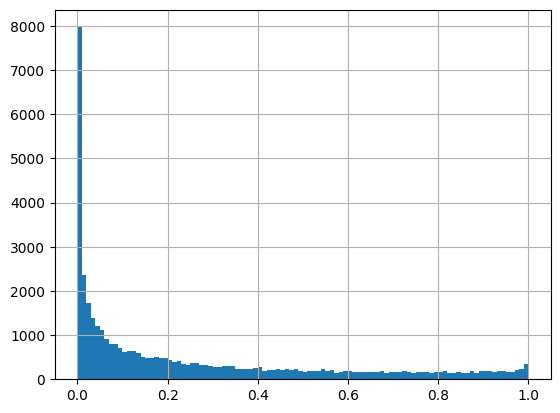

In [5]:
# Plot a histogram of the acousticness from spotify_population with bins of width 0.01
import matplotlib.pyplot as plt

# set same variable names from exercises in my own notebook
spotify_population = spotify.copy()

spotify_population['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

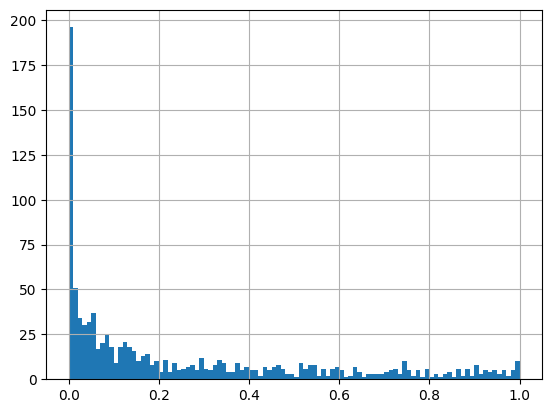

In [6]:
spotify_sample['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

In [7]:
spotify_population['duration_minutes'].describe(), spotify_sample['duration_minutes'].describe()

(count    41656.000000
 mean         3.852152
 std          1.505201
 min          0.505017
 25%          3.197333
 50%          3.704883
 75%          4.290450
 max         90.058333
 Name: duration_minutes, dtype: float64,
 count    1000.000000
 mean        3.873422
 std         1.151578
 min         0.961967
 25%         3.210025
 50%         3.700775
 75%         4.327450
 max         9.994667
 Name: duration_minutes, dtype: float64)

### Are these findings generalizable?
Let's look at another sample to see if it is representative of the population. This time, you'll look at the duration_minutes column of the Spotify dataset, which contains the length of the song in minutes.

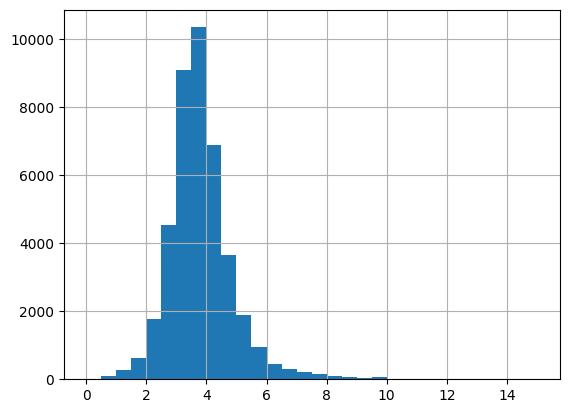

In [8]:
spotify_population['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

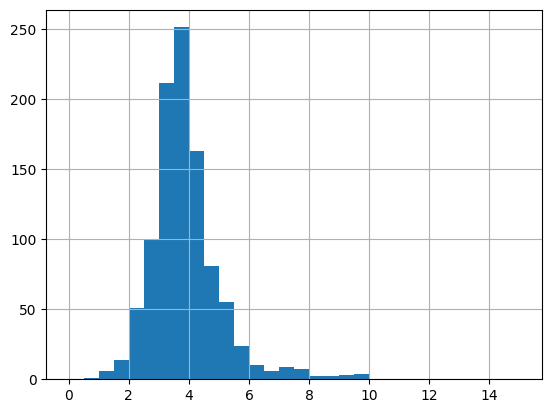

In [9]:
spotify_sample['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

* The duration values in the sample show a similar distribution to those in the whole population, so the results are `generalizable`.

![Screen Shot 2023-02-27 at 9.49.37 AM](Screen%20Shot%202023-02-27%20at%209.49.37%20AM.png)

### What Does Random Mean
* This definition from Oxford Languages is the most interesting for us. If we want to choose data points at random from a population, we **shouldn't be able to predict which data points** would be selected ahead of time in some systematic way.

### Random numbers seeds
To set a random seed with NumPy, we use the dot-random-dot-seed method. random-dot-seed takes an integer for the seed number, which can be any number you like. dot-normal generates pseudo-random numbers from the normal distribution. The loc and scale arguments set the mean and standard deviation of the distribution, and the size argument determines how many random numbers from that distribution will be returned. If we call dot-normal a second time, we get two different random numbers. If we reset the seed by calling random-dot-seed with the same seed number, then call dot-normal again, we get the same numbers as before. This makes our code reproducible.

### Generating random numbers
You've used .sample() to generate pseudo-random numbers from a set of values in a DataFrame. A related task is to generate random numbers that follow a statistical distribution, like the uniform distribution or the normal distribution.

In [10]:
# Generate 5000 numbers from a uniform distribution
uniforms = np.random.uniform(low=-3, high=3, size=5000)
print(type(uniforms), len(uniforms), uniforms.shape)

# Generate random numbers from a Normal(5, 2) - loc:mean, scale:stdev
normals = np.random.normal(loc=5, scale=2, size=5000)
print(type(normals), len(normals), normals.shape, '\n', pd.DataFrame(normals).describe())

<class 'numpy.ndarray'> 5000 (5000,)
<class 'numpy.ndarray'> 5000 (5000,) 
                  0
count  5000.000000
mean      4.977780
std       1.995124
min      -1.851670
25%       3.628795
50%       4.968068
75%       6.337729
max      11.688454


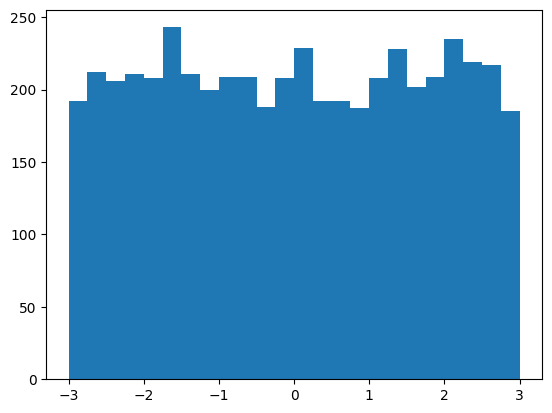

In [11]:
# Plot a histogram of uniform values, binwidth 0.25
# note here the uniforms or numpy array doesn't have a hist or plot type method but the plt.hist() can take our sequence of values as a distribution
plt.hist(uniforms, bins=np.arange(-3, 3.25, 0.25))
plt.show()

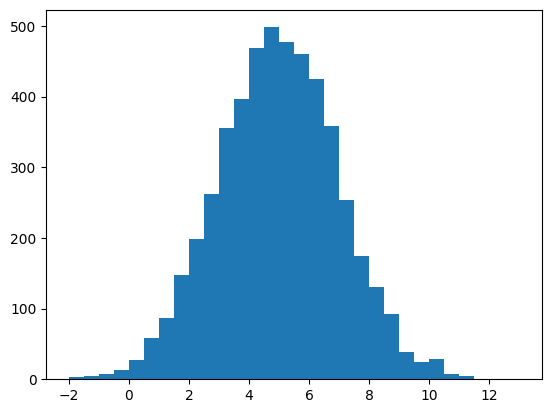

In [12]:
# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, bins=np.arange(-2, 13.5, 0.5))
plt.show()

### Understanding random seeds
While random numbers are important for many analyses, they create a problem: the results you get can vary slightly. This can cause awkward conversations with your boss when your script for calculating the sales forecast gives different answers each time.

Setting the `seed` for numpy's random number generator helps avoid such problems by making the random number generation reproducible.

![Screen Shot 2023-02-27 at 10.04.02 AM](Screen%20Shot%202023-02-27%20at%2010.04.02%20AM.png)
* Must set the seed twice to have identical distributions between the two variables in the screenshot above

<br>

## Sampling Methods
It’s time to get hands-on and perform the four random sampling methods in Python: **simple, systematic, stratified, and cluster**.

### Simple random sampling
The simplest method of sampling a population is the one you've seen already. It is known as simple random sampling (sometimes abbreviated to "SRS"), and involves picking rows at random, one at a time, where each row has the same chance of being picked as any other.

In this chapter, you'll apply sampling methods to a synthetic (fictional) employee attrition dataset from IBM, where "attrition" in this context means leaving the company.

In [13]:
attrition_pop = attrition.copy()

# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

# Print the sample (Notice how the indexes in the sample aren't always in increasing order. They are just random.)
attrition_samp.head(15)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1134,35,0.0,Travel_Rarely,583,Research_Development,25,Master,Medical,High,Female,57,High,3,Healthcare_Representative,High,Divorced,10388,6975,1,Yes,11,Excellent,High,1,16,3,Good,16,10,10,1
1150,52,0.0,Non-Travel,585,Sales,29,Master,Life_Sciences,Low,Male,40,High,1,Sales_Representative,Very_High,Divorced,3482,19788,2,No,15,Excellent,Medium,2,16,3,Good,9,8,0,0
531,33,0.0,Travel_Rarely,931,Research_Development,14,Bachelor,Medical,Very_High,Female,72,High,1,Research_Scientist,Medium,Married,2756,4673,1,No,13,Excellent,Very_High,1,8,5,Better,8,7,1,6
395,31,0.0,Travel_Rarely,1332,Research_Development,11,College,Medical,High,Male,80,High,2,Healthcare_Representative,Low,Married,6833,17089,1,Yes,12,Excellent,Very_High,0,6,2,Good,6,5,0,1
392,29,0.0,Travel_Rarely,942,Research_Development,15,Below_College,Life_Sciences,Medium,Female,69,Low,1,Research_Scientist,Very_High,Married,2168,26933,0,Yes,18,Excellent,Low,1,6,2,Good,5,4,1,3
304,38,0.0,Travel_Rarely,1153,Research_Development,6,College,Other,Very_High,Female,40,Medium,1,Laboratory_Technician,High,Married,3702,16376,1,No,11,Excellent,Medium,1,5,3,Better,5,4,0,4
1135,34,0.0,Travel_Rarely,216,Sales,1,Master,Marketing,Medium,Male,75,Very_High,2,Sales_Executive,Very_High,Divorced,9725,12278,0,No,11,Excellent,Very_High,1,16,2,Good,15,1,0,9
1350,52,0.0,Travel_Frequently,322,Research_Development,28,College,Medical,Very_High,Female,59,Very_High,4,Manufacturing_Director,High,Married,13247,9731,2,Yes,11,Excellent,Medium,1,24,3,Good,5,3,0,2
902,31,0.0,Travel_Rarely,311,Research_Development,20,Bachelor,Life_Sciences,Medium,Male,89,High,2,Laboratory_Technician,High,Divorced,4197,18624,1,No,11,Excellent,Low,1,10,2,Better,10,8,0,2
443,33,0.0,Travel_Rarely,924,Research_Development,2,Bachelor,Medical,High,Male,78,High,1,Laboratory_Technician,Very_High,Single,2496,6670,4,No,11,Excellent,Very_High,0,7,3,Better,1,1,0,0


### Systematic sampling
One sampling method that avoids randomness is called **systematic sampling**. Here, you pick rows from the population at regular intervals.

For example, if the population dataset had one thousand rows, and you wanted a sample size of five, you could pick rows 0, 200, 400, 600, and 800.

In [14]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

print(pop_size, '\n', interval, 1470/70)

# Systematically sample attrition_pop to get the rows of the population at each interval, starting at 0; assign the rows to attrition_sys_samp.
attrition_sys_samp = attrition_pop.iloc[::interval]
print('\n')
print(attrition_sys_samp.head(), len(attrition_sys_samp) == sample_size)

1470 
 21 21.0


    Age  Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0    21        0.0  ...                       0                     0
21   19        0.0  ...                       0                     0
42   45        0.0  ...                       0                     0
63   23        0.0  ...                       0                     1
84   30        1.0  ...                       0                     0

[5 rows x 31 columns] True


### Is systematic sampling OK?
Systematic sampling has a problem: if the data has been sorted, or there is some sort of pattern or meaning behind the row order, then the resulting sample may not be representative of the whole population. The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random sampling.

Here you'll look at how to determine whether or not there is a problem.

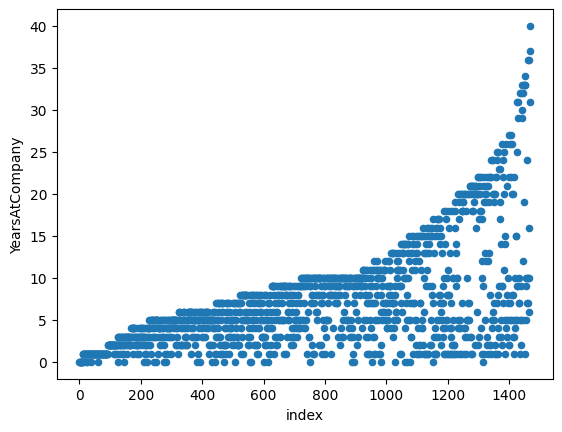

In [15]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

attrition_pop_id.plot(kind='scatter', x='index', y='YearsAtCompany')
plt.show()


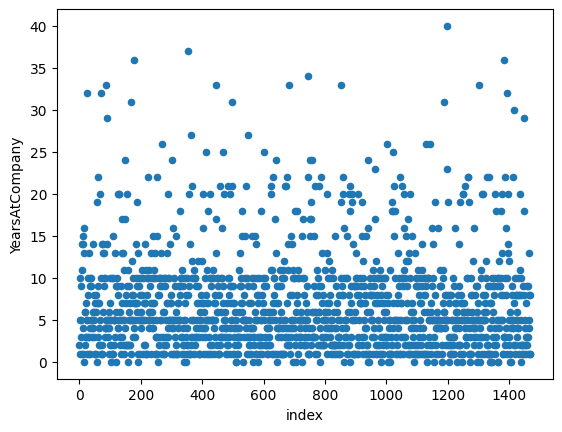

In [16]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)
attrition_shuffled.shape, attrition_pop.shape # notice here the frac as a whole percentage simply returns the dataframe rows in a different order

# # Reset the row indexes and create an index column (reset and drop shuffled index), then reset_index which will have id column in numeric order (distribution should look different)
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(kind='scatter', x='index', y='YearsAtCompany')
plt.show()

* **Systematic sampling** has problems when the data are sorted or contain a pattern. Shuffling the rows makes it equivalent to simple random sampling.

### Proportional stratified sampling
If you are interested in **subgroups** within the population, then you may need to carefully control the counts of each subgroup within the population. 
* Proportional stratified sampling results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.

In [17]:
print(attrition_pop.Education.value_counts(normalize=True))

# Proportion of employees by Education Level
education_counts_pop = attrition_pop.Education.value_counts(normalize=True)

print('\n')
# Use proportional stratified sampling on attrition_pop to sample 40% of each Education group, setting the seed to 2022.
# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education').sample(frac=.4, random_state=2022)

# Notice here how the education counts for the stratified sample are representative of the population's dataframe eductaion proprotion
print(attrition_strat.Education.value_counts(normalize=True))
print(f"Len of the attrition population : {len(attrition_pop)}. Len of the attrition stratified sample : {len(attrition_strat)}")
# Len is exactly 40% of the original dataframe  with representative proportions from each sample by the population proportion

Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64


Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: Education, dtype: float64
Len of the attrition population : 1470. Len of the attrition stratified sample : 588


* Perfectly proportioned! By grouping then sampling, the size of each group in the sample is representative of the size of the sample in the population.

### Equal counts stratified sampling
If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you can use equal counts stratified sampling to generate samples where each subgroup has the same amount of data. For example, if you are analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample.

In [18]:
# Get 30 employees from each Education group
# Use equal counts stratified sampling on attrition_pop to get 30 employees from each Education group, setting the seed to 2022
attrition_eq = attrition_pop.groupby('Education').sample(n=30, random_state=2022)

# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)

# Print the results
print(education_counts_eq)

Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64


* Elegant equal count creation! If you want each subgroup to have equal weight in your analysis, then equal counts stratified sampling is the appropriate technique.

### Weighted sampling
Stratified sampling provides rules about the probability of picking rows from your dataset at the subgroup level. A generalization of this is weighted sampling, which lets you specify rules about the probability of picking rows at the row level. 
* The probability of picking any given row is proportional to the weight value for that row.

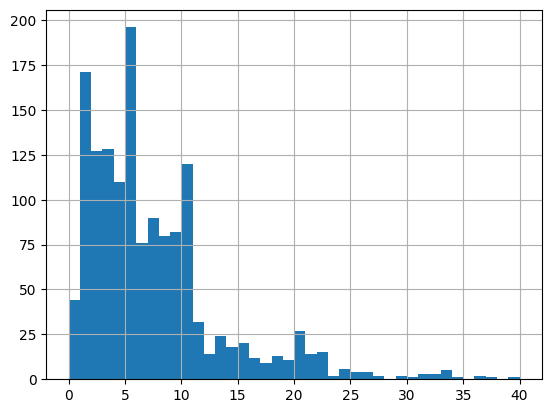

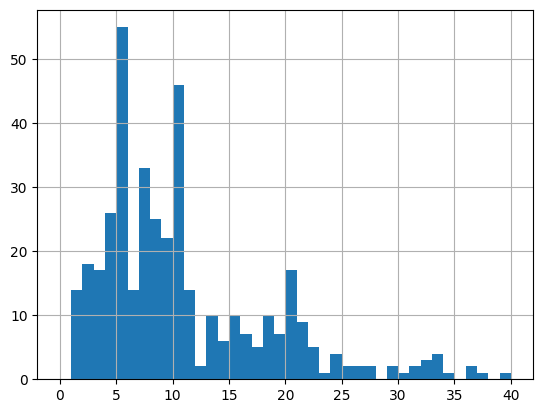

In [19]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights='YearsAtCompany')

# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

* The weighted sample mean is around 11, which is higher than the population mean of around 7. The fact that the two numbers are different means that the weighted simple random sample is biased.
* One of the very powerful features of the Pandas .sample() method is to apply different weights to certain rows, meaning that **some rows will have a higher chance of being selected than others**.

In [20]:
attrition_pop['YearsAtCompany'].describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

In [21]:
attrition_pop.sample(n=400, weights='YearsAtCompany')['YearsAtCompany'].describe()

count    400.000000
mean      11.495000
std        7.565253
min        1.000000
25%        6.000000
50%       10.000000
75%       16.000000
max       40.000000
Name: YearsAtCompany, dtype: float64

### Cluster Sampling
The main benefit of **cluster sampling** over stratified sampling is that you can save time and money by not including every subgroup in your sample.

### Performing cluster sampling
Now that you know when to use cluster sampling, it's time to put it into action. In this exercise, you'll explore the JobRole column of the attrition dataset. You can think of each job role as a subgroup of the whole population of employees.

In [22]:
import random

# Create a list of unique JobRole values
job_roles_pop = attrition_pop['JobRole'].unique().tolist()

# Randomly sample four JobRole values (set seed for reproducibility)
random.seed(19790801)
job_roles_samp = random.sample(job_roles_pop, k=4)

# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# (Note here the values still exist for the column after filtering but chaining the categorical and remove-unused_categories method will omit the following unused categoreis)
print(attrition_filtered['JobRole'].unique().tolist(), '\n',attrition_filtered['JobRole'].value_counts(normalize=True), '\n')

# Remove Unused Categories
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()
print(attrition_filtered['JobRole'].unique().tolist(), '\n', attrition_filtered['JobRole'].value_counts(normalize=True), '\n')

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby('JobRole').sample(n=10, random_state=2022)
attrition_clust['JobRole'].value_counts(normalize=True)

['Research_Scientist', 'Human_Resources', 'Research_Director', 'Manager'] 
 Research_Scientist           0.555133
Manager                      0.193916
Research_Director            0.152091
Human_Resources              0.098859
Healthcare_Representative    0.000000
Laboratory_Technician        0.000000
Manufacturing_Director       0.000000
Sales_Executive              0.000000
Sales_Representative         0.000000
Name: JobRole, dtype: float64 

['Research_Scientist', 'Human_Resources', 'Research_Director', 'Manager'] 
 Research_Scientist    0.555133
Manager               0.193916
Research_Director     0.152091
Human_Resources       0.098859
Name: JobRole, dtype: float64 



Human_Resources       0.25
Manager               0.25
Research_Director     0.25
Research_Scientist    0.25
Name: JobRole, dtype: float64

* The two-stage sampling technique gives you control over sampling both between subgroups and within subgroups.

### 3 kinds of sampling
You're going to compare the performance of point estimates using simple, stratified, and cluster sampling. Before doing that, you'll have to set up the samples.

You'll use the `RelationshipSatisfaction` column of the attrition_pop dataset, which categorizes the employee's relationship with the company. It has four levels: Low, Medium, High, and Very_High.

In [23]:
# Perform simple random sampling on attrition_pop to get one-quarter of the population, setting the seed to 2022
attrition_srs = attrition_pop.sample(frac=.25, random_state=2022)
print(len(attrition_pop), len(attrition_srs), 368/1470, '\n')

print(attrition_pop['RelationshipSatisfaction'].value_counts(normalize=True))
# Perform stratified sampling on attrition_pop to sample one-quarter of each RelationshipSatisfaction group, setting the seed to 2022
attrition_strat = attrition_pop.groupby('RelationshipSatisfaction').sample(frac=.25, random_state=2022)
print(attrition_strat['RelationshipSatisfaction'].value_counts(normalize=True))

## Note how the categorical relationship column give the same proporitionaly make-up and simply selects 25% of each groupby value to sustain equal proportions

1470 368 0.2503401360544218 

High         0.312245
Very_High    0.293878
Medium       0.206122
Low          0.187755
Name: RelationshipSatisfaction, dtype: float64
High         0.312500
Very_High    0.293478
Medium       0.206522
Low          0.187500
Name: RelationshipSatisfaction, dtype: float64


In [24]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop['RelationshipSatisfaction'].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique, k=2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop['RelationshipSatisfaction'].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition]
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()

# Perform cluster sampling on the selected group, getting 0.25 of attrition_clust_prep
attrition_clust = attrition_clust_prep.groupby("RelationshipSatisfaction")\
    .sample(n=len(attrition_clust_prep) // 4, random_state=2022)

In [25]:
# Comparing Point Estimates

# Mean Attrition by RelationshipSatisfaction group
mean_attrition_pop = attrition_pop.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_pop, '\n')

# Calculate the same thing for the simple random sample 
mean_attrition_srs = attrition_srs.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_srs, '\n')

# Calculate the same thing for the stratified sample 
mean_attrition_strat = attrition_strat.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_strat, '\n')

# Calculate the proportion of employee attrition for each relationship satisfaction group, this time on the cluster sample, attrition_clust.
# Calculate the same thing for the cluster sample 
mean_attrition_clust = attrition_clust.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_clust)

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64 

RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64 

RelationshipSatisfaction
Low          0.144928
Medium       0.078947
High         0.165217
Very_High    0.129630
Name: Attrition, dtype: float64 

RelationshipSatisfaction
Low     0.213115
High    0.125683
Name: Attrition, dtype: float64


<br>

## Sampling Distributions

Let’s test your sampling. In this chapter, you’ll discover how to quantify the accuracy of sample statistics using relative errors, and measure variation in your estimates by generating sampling distributions.

![Screen Shot 2023-02-27 at 12.44.53 PM](Screen%20Shot%202023-02-27%20at%2012.44.53%20PM.png)
#### Relative Errors
* For any of these sample sizes, we want to compare the population mean to the sample mean. 
* This is the same code we just saw, but with the numerical sample size replaced with a variable named sample_size. T
	* The most common metric for assessing the difference between the population and a sample mean is the **relative error**. 
	* The relative error is the absolute difference between the two numbers; that is, we ignore any minus signs, divided by the population mean. Here, we also multiply by one hundred to make it a percentage

<br>

### Calculating relative errors
The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.

The most common metric for assessing accuracy is relative error. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.

In [28]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct50 = 100 * abs(attrition_pop['Attrition'].mean() - mean_attrition_srs50) / attrition_pop['Attrition'].mean()

# Print rel_error_pct50
print(rel_error_pct50)

62.78481012658227


In [29]:
# mean_attrition_pop for population
mean_attrition_pop = attrition_pop['Attrition'].mean()

# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = (100 * abs(mean_attrition_pop - mean_attrition_srs100)) / mean_attrition_pop

# Print rel_error_pct100
print(rel_error_pct100)

6.962025316455695


* Quick note here is the fairly substantial approximation of the relative error for a sample statistic that starts to encompass more values of a simple rando sample.
* As you increase the sample size, the sample mean generally gets closer to the population mean, and the relative error decreases.

### Relative error vs. sample size
The plot shows the relative error in the proportion of employee attritions, using simple random sampling, for sample sizes from 2 to 1470 (the size of the population).
![Screen Shot 2023-02-27 at 12.54.58 PM](Screen%20Shot%202023-02-27%20at%2012.54.58%20PM.png)

<br>

### Creating a sampling distribution
Replicating samples
When you calculate a point estimate such as a sample mean, the value you calculate depends on the rows that were included in the sample. That means that there is some randomness in the answer. In order to quantify the variation caused by this randomness, you can create many samples and calculate the sample mean (or another statistic) for each sample.

[0.15, 0.2, 0.1, 0.21666666666666667, 0.18333333333333332]


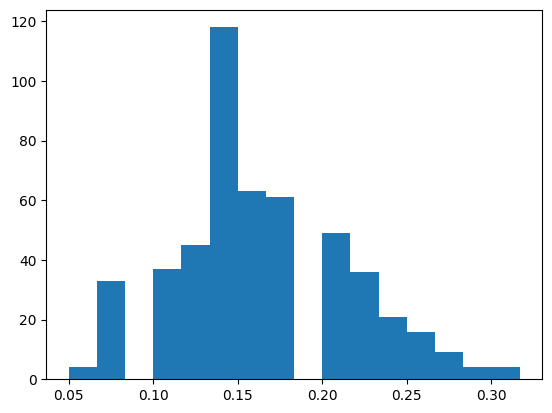

In [31]:
# Create an empty list
mean_attritions = []

# Loop 500 time to create 500 sample means of size 60 samples
for _ in range(500):
    mean_attritions.append(
        attrition_pop.sample(n=60)['Attrition'].mean()
    )

# Print out the first few entries of the list
print(mean_attritions[:5])

# Draw a histogram of the mean_attritions list with 16 bins
plt.hist(mean_attritions, bins=16)
plt.show()

* As sample size increases, on average each sample mean has a lower relative error compared to the population mean, thus reducing the range of the distribution.

<br>

### Exact sampling distribution
To quantify how the **point estimate (sample statistic)** you are interested in varies, you need to know all the possible values it can take and how often. That is, you need to know its distribution.

The distribution of a sample statistic is called the sampling distribution. When we can calculate this exactly, rather than using an approximation, it is known as the exact sampling distribution.

In [32]:
from itertools import product 
def expand_grid(data_dict):
    rows = product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

df = expand_grid({'height':[60,70], 'weight':[100, 140, 180], 'sex':['Female', 'Male']})
df

,height,weight,sex
0,60,100,Female
1,60,100,Male
2,60,140,Female
3,60,140,Male
4,60,180,Female
5,60,180,Male
6,70,100,Female
7,70,100,Male
8,70,140,Female
9,70,140,Male


In [38]:
# Expand a grid representing 5 8-sided dice. That is, create a DataFrame with five columns from a dictionary, named die1 to die5. The rows should contain all possibilities for throwing five dice, each numbered 1 to 8.
data_dict_dice = {key: list(np.arange(1, 9)) for key in ['dice' + str(i) for i in range(1,6)]}
dice = expand_grid(data_dict_dice)
dice.shape, dice.head(5) # That's a lot!

((32768, 5),
    dice1  dice2  dice3  dice4  dice5
 0      1      1      1      1      1
 1      1      1      1      1      2
 2      1      1      1      1      3
 3      1      1      1      1      4
 4      1      1      1      1      5)

   dice1  dice2  dice3  dice4  dice5 mean_roll
0      1      1      1      1      1       1.0
1      1      1      1      1      2       1.2
2      1      1      1      1      3       1.4
3      1      1      1      1      4       1.6
4      1      1      1      1      5       1.8


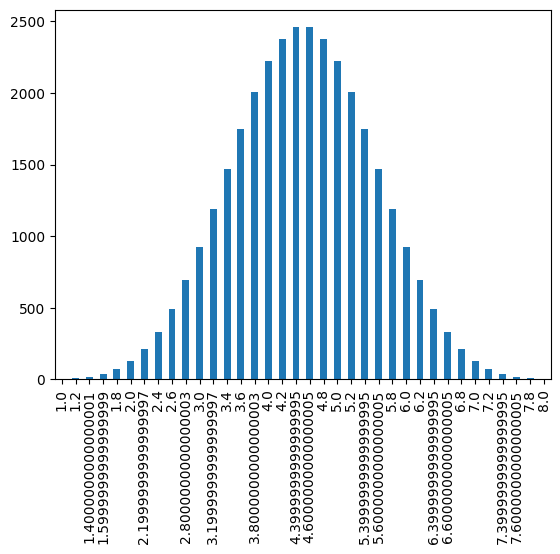

In [43]:
# Add a column, mean_roll, to dice, that contains the mean of the five rolls as a categorical.
dice['mean_roll'] = dice.mean(axis='columns') # set mean of each row instance for mean average of that turn

# Set as categorical?
dice['mean_roll'] = dice['mean_roll'].astype('category')

print(dice.head())

# Create a bar plot of the mean_roll categorical column, so it displays the count of each mean_roll in increasing order from 1.0 to 8.0.
dice['mean_roll'].value_counts(sort=False).plot(kind='bar')
plt.show()

### Generating an approximate sampling distribution
Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is 8**5, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.

In this situation, you can calculate an approximate sampling distribution by simulating the exact sampling distribution. That is, you can repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.

In [47]:
# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1, 9)), size=5, replace=True)

# Print the mean of five_rolls
print(five_rolls.mean(), five_rolls)

# Replicate the sampling code 1000 times, assigning each result to the list sample_means_1000.
sample_means_1000 = []
for _ in range(1000):
    # Pick between 1-8 five times w/replacement and append sample list mean return from numpy to outside list
    sample_means_1000.append(np.random.choice(list(range(1,9)), size=5, replace=True).mean())
    
# Print the first 10 entries of the result
print(sample_means_1000[0:10])

3.4 [1 2 8 3 3]
[3.4, 5.8, 4.2, 5.0, 5.2, 4.8, 3.8, 6.0, 6.2, 3.8]


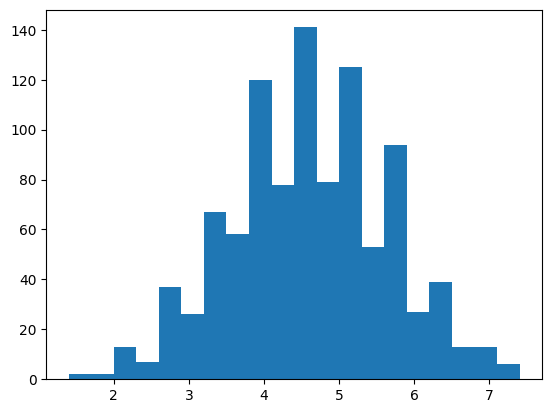

In [48]:
# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins=20)
plt.show()

### Standard errors and the Central Limit Theorem
* CLT: The means of independent samples have normal distributions. Then, as the sample size increases, we see two things. The distribution of these averages gets closer to being normal, and the width of this sampling distribution gets narrower.
* Specify **ddof=0** when calling .std() on populations
* * Specify **ddof=1** when calling .std() on samples or sampling distributions

## Bootstrapping 
![Screen Shot 2023-02-27 at 2.05.08 PM](Screen%20Shot%202023-02-27%20at%202.05.08%20PM.png)

<br>

### Generating a bootstrap distribution
The process for generating a bootstrap distribution is similar to the process for generating a sampling distribution; only the first step is different.

To make a sampling distribution, you start with the population and sample without replacement. To make a bootstrap distribution, you start with a sample and sample that with replacement. After that, the steps are the same: calculate the summary statistic that you are interested in on that sample/resample, then replicate the process many times. In each case, you can visualize the distribution with a histogram.

In [58]:
# Using the entire dataset (matches exercises dataframe shape) which serves as the sample we are starting with prior to bootsrapping
spotify_sample_1 = spotify_population[['artists', 'name', 'danceability']].reset_index()
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample_1.sample(frac=1, replace=True)
print(spotify_sample_1_resample.head())

       index  ... danceability
26383  26383  ...        0.585
30829  30829  ...        0.506
18218  18218  ...        0.532
3781    3781  ...        0.405
7373    7373  ...        0.552

[5 rows x 4 columns]


In [59]:
# Calculate of the danceability column of spotify_1_resample
mean_danceability_1 = np.mean(spotify_1_resample['danceability'])

# Print the result
print(mean_danceability_1)

0.5924953043979259


In [62]:
# Replicate this 1000 times
mean_danceability_1000 = []
for _ in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample_1.sample(frac=1, replace=True)['danceability'])
	)
  
# Print the result
print(mean_danceability_1000[:15])

[0.5901574803149607, 0.5909606203188016, 0.5913687271941617, 0.5913037017476475, 0.5915479930862301, 0.5914501872479355, 0.589982929229883, 0.5916502472632994, 0.5914821898405991, 0.590094425772998, 0.5906912809679279, 0.5900874087766468, 0.5895275302477435, 0.5906408824659113, 0.5907761931054349]


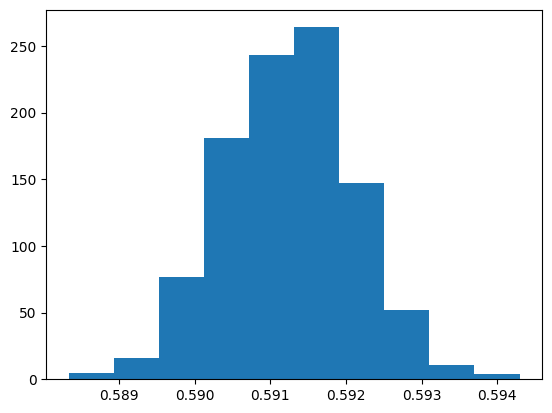

In [63]:
# Create a bootstrap distribution by drawing a histogram of mean_danceability_1000.
plt.hist(mean_danceability_1000)
plt.show()

![Screen Shot 2023-02-27 at 2.26.31 PM](Screen%20Shot%202023-02-27%20at%202.26.31%20PM.png)
* To recap, the **estimated standard error** is the standard deviation of the bootstrap distribution values for our statistic of interest. 
* This estimated standard error times the square root of the sample size gives a really good estimate of the standard deviation of the population. 
	* That is, although bootstrapping was poor at estimating the population mean, it is generally great for estimating the population standard deviation.

<br>

### Sampling distribution vs. bootstrap distribution
The sampling distribution and bootstrap distribution are closely linked. In situations where you can repeatedly sample from a population (these occasions are rare), it's helpful to generate both the sampling distribution and the bootstrap distribution, one after the other, to see how they are related.

Here, the statistic you are interested in is the mean popularity score of the songs.

In [68]:
# Create 500 randomly samples rows from spotify_population
spotify_sample_500 = spotify_population.sample(n=500, replace=False).reset_index() # add index column (exercises do too)

# Generate a sampling distribution of 2000 replicates.
mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_samp.append(
    	# Sample 500 rows and calculate the mean popularity     
    	spotify_population.sample(n=500)['popularity'].mean()
    )

# Print the sampling distribution results
print(mean_popularity_2000_samp[:10], len(mean_popularity_2000_samp))

[55.004, 54.752, 55.112, 54.61, 54.664, 55.152, 55.208, 54.61, 54.406, 54.598] 2000


In [70]:
# Generate a bootstrap distribution of 2000 replicates.
# Sample 500 rows of the sample with replacement and calculate the mean popularity.

mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for _ in range(2000):
    mean_popularity_2000_boot.append(spotify_sample_500.sample(n=500, replace=True)['popularity'].mean())
    
print(mean_popularity_2000_boot[:10], np.mean(mean_popularity_2000_boot))

[54.764, 55.69, 55.228, 55.124, 55.058, 55.574, 54.924, 54.174, 54.302, 55.362] 54.943369


In [72]:
## Compare sampling and bootstrap means

# Calculate the population mean popularity
pop_mean = spotify_population['popularity'].mean()

# Calculate the original sample mean popularity
samp_mean = spotify_sample_500['popularity'].mean()

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(mean_popularity_2000_samp)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(mean_popularity_2000_boot)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 54.94, 54.828081000000005, 54.943369]


* The sampling distribution mean can be used to estimate the population mean, but that is not the case with the bootstrap distribution.

### Compare sampling and bootstrap standard deviations
In the same way that you looked at how the sampling distribution and bootstrap distribution could be used to estimate the population mean, you'll now take a look at how they can be used to estimate variation, or more specifically, the standard deviation, in the population.

In [73]:
# Calculate the population std dev popularity
pop_sd = spotify_population['popularity'].std(ddof=0)

# Calculate the original sample std dev popularity
samp_sd = spotify_sample['popularity'].std()

# Calculate the sampling dist'n estimate of std dev popularity
samp_distn_sd = np.std(mean_popularity_2000_samp, ddof=1) * np.sqrt(5000)

# Calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(mean_popularity_2000_boot, ddof=1) * np.sqrt(5000)

# Print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])

[10.880065274257536, 10.691482956438167, 34.59731730029352, 34.798119687159556]


<br>

### Confidence Intervals
* Confidence intervals account for uncertainty in our estimate of a population parameter by providing a range of possible values. We are confident that the true value lies somewhere in the interval specified by that range.

In [74]:
bootstrap_distn = [55.0056, 54.864, 54.4432, 54.9384, 54.872, 54.8336, 54.8244, 54.9168, 54.8788, 54.938, 54.8136, 54.8764, 54.7666, 55.0062, 54.8504, 54.704, 54.8078, 54.864, 54.7252, 54.6684, 54.9718, 54.9884, 54.77, 54.6544, 54.9676, 54.998, 54.8628, 55.1054, 54.8548, 54.6664, 54.8616, 54.7162, 54.816, 54.666, 55.064, 54.8698, 55.0112, 55.105, 54.8244, 54.7138, 54.631, 54.8058, 54.7044, 54.91, 55.0802, 54.9446, 54.9656, 54.7686, 54.766, 54.8226, 54.7016, 54.7066, 54.7098, 55.094, 54.8862, 54.8138, 54.9938, 54.7216, 54.9102, 54.8852, 54.7342, 55.113, 54.9044, 54.8782, 55.0052, 54.983, 55.0566, 54.9736, 54.7242, 54.964, 54.9462, 55.1176, 54.88, 54.9532, 54.8766, 54.8698, 54.823, 55.1166, 54.781, 54.7628, 55.1218, 54.878, 54.6916, 54.861, 55.1548, 54.99, 54.7836, 54.776, 54.89, 54.9024, 54.9612, 54.8424, 54.8852, 54.951, 54.9538, 54.8974, 54.8582, 54.921, 54.7592, 55.0124, 54.9156, 54.6516, 54.6746, 54.796, 54.865, 55.1024, 54.5616, 54.5012, 54.7662, 54.683, 54.8666, 54.848, 55.0452, 54.6884, 54.5426, 54.9876, 54.911, 54.782, 54.6918, 54.6736, 54.912, 54.7204, 54.9486, 55.2172, 54.9376, 54.819, 54.7066, 54.8762, 55.032, 54.7568, 54.8116, 54.8264, 54.927, 54.9998, 54.6566, 54.7746, 55.108, 55.008, 54.8426, 54.8316, 55.0438, 54.9286, 54.7494, 54.7182, 54.9804, 54.8788, 54.8114, 55.103, 54.884, 55.0328, 54.9326, 55.1458, 55.0102, 54.8962, 54.625, 54.7892, 54.8282, 54.9336, 55.051, 54.544, 54.8418, 54.9396, 54.826, 54.8384, 54.992, 54.7446, 54.8006, 54.7286, 54.98, 54.8184, 55.0642, 54.588, 54.7778, 54.9288, 55.1772, 54.8998, 54.782, 54.9422, 54.7, 54.8988, 54.9616, 54.8962, 54.891, 54.6182, 54.7616, 54.8336, 55.0382, 55.1674, 54.6904, 54.9824, 54.686, 54.786, 54.929, 54.5166, 54.7296, 55.1312, 54.955, 54.829, 54.7986, 54.8022, 55.1064, 54.8174, 54.7574, 54.7828, 54.8088, 54.917, 54.8458, 54.9682, 54.8422, 54.76, 54.9388, 54.756, 54.8894, 55.029, 54.6694, 54.7202, 54.9562, 54.9074, 54.879, 54.9946, 55.0392, 54.8144, 55.0648, 54.8994, 54.8176, 55.068, 54.8086, 54.9146, 54.809, 54.8334, 55.02, 55.028, 54.9926, 54.9778, 54.7868, 54.9002, 55.0014, 54.9358, 54.9338, 54.9154, 54.959, 54.9238, 54.7866, 54.6896, 55.0244, 54.9992, 54.6138, 54.9076, 54.8684, 54.601, 54.5118, 54.5426, 54.541, 54.6754, 55.0208, 54.923, 55.1516, 54.7578, 54.7234, 55.0396, 54.7748, 54.756, 55.1496, 55.069, 55.0012, 54.9768, 54.4656, 55.1118, 54.8864, 54.8824, 54.8226, 54.7726, 54.868, 55.0994, 55.0226, 54.8582, 54.769, 54.8094, 55.18, 54.879, 54.5916, 54.802, 55.0132, 54.795, 55.2438, 55.0618, 54.9994, 54.8088, 54.707, 55.0694, 55.0702, 54.8046, 54.6538, 54.947, 54.9646, 54.8742, 54.9544, 54.964, 54.997, 54.8404, 55.0846, 54.7786, 54.8544, 55.0708, 54.774, 54.7902, 54.8528, 54.8124, 54.7538, 54.8794, 54.961, 54.6482, 54.7908, 54.707, 54.5174, 54.9898, 54.919, 55.0184, 54.957, 55.0986, 54.9562, 54.746, 54.8552, 54.9212, 54.7656, 55.0338, 54.8186, 54.5982, 54.6524, 54.9672, 54.813, 54.8376, 54.7448, 54.8128, 54.85, 54.844, 54.9152, 54.7566, 54.9896, 54.7308, 55.3492, 54.8, 54.808, 54.8958, 54.8216, 54.5702, 55.0128, 55.0044, 54.7496, 54.9698, 54.6902, 54.8036, 55.213, 54.9834, 54.9306, 55.1034, 55.1134, 54.6384, 54.8564, 54.8222, 54.761, 54.789, 54.682, 54.9, 54.739, 54.624, 54.6304, 55.0104, 54.938, 54.8204, 54.8284, 54.841, 54.7784, 54.776, 54.883, 54.803, 54.9202, 54.8942, 54.6024, 54.7786, 54.8172, 54.9056, 54.8672, 54.9972, 54.808, 54.5436, 54.8274, 54.7846, 54.6488, 54.7492, 54.8664, 54.8802, 54.8128, 55.0204, 55.0462, 54.7936, 54.6378, 54.9118, 54.9464, 54.9952, 54.7252, 54.957, 54.8454, 54.7742, 54.9444, 54.7774, 54.936, 54.9354, 54.9048, 54.6534, 54.7978, 54.8446, 54.9392, 55.0548, 54.713, 55.3528, 54.6716, 54.8256, 54.901, 54.8274, 55.0102, 54.9086, 54.9992, 54.7922, 54.7608, 54.728, 54.7112, 54.933, 54.6168, 54.8488, 54.8448, 54.7978, 54.6506, 54.6908, 54.7818, 54.9618, 54.9148, 54.7316, 54.79, 54.8274, 54.8546, 54.4502, 54.7828, 54.9636, 54.6356, 54.6384, 54.8176, 55.0264, 54.9612, 55.1794, 54.53, 55.2594, 54.6664, 55.007, 54.8438, 54.7042, 55.034, 54.858, 54.9506, 54.9106, 54.7806, 54.9762, 54.826, 54.613, 54.594, 54.9834, 54.8302, 55.0474, 54.896, 54.7456, 54.6894, 54.9542, 54.986, 54.97, 55.1974, 54.69, 55.1446, 55.165, 54.886, 55.0874, 54.6462, 54.9974, 55.0916, 54.9144, 54.825, 54.7808, 54.7412, 54.8138, 54.9658, 54.7478, 54.745, 54.7158, 54.8192, 55.006, 55.0728, 54.9048, 54.6688, 54.805, 54.9924, 54.9656, 54.8312, 55.0952, 54.835, 54.7174, 55.0078, 54.7216, 54.854, 54.9036, 54.7346, 55.0888, 54.7706, 54.864, 54.985, 55.0008, 54.8216, 55.0404, 54.968, 54.959, 55.3308, 54.8604, 54.5608, 54.9164, 55.119, 55.0288, 54.6116, 55.0288, 54.7952, 55.0724, 54.6252, 54.9196, 54.8584, 54.8994, 54.7034, 54.7928, 54.75, 54.7054, 55.0974, 54.997, 54.7558, 54.8106, 55.0246, 55.0652, 54.874, 54.5394, 55.0602, 54.9354, 54.7536, 54.68, 54.6762, 54.6786, 54.922, 54.9948, 54.6088, 54.8158, 54.9878, 55.0032, 55.042, 54.903, 55.0066, 54.904, 54.989, 54.6362, 54.7948, 55.1, 55.0322, 54.907, 54.8374, 54.7678, 54.9538, 55.0482, 54.6916, 54.9548, 55.0764, 54.5392, 54.8946, 54.9742, 54.96, 54.7948, 55.0424, 54.987, 54.8936, 55.0038, 54.8592, 54.8998, 54.7352, 54.6492, 54.7678, 54.7318, 54.9848, 54.9478, 54.9442, 55.0728, 54.7336, 54.7836, 54.8776, 54.8946, 55.0516, 54.6022, 54.9454, 55.0934, 54.8436, 55.056, 54.9396, 54.9022, 54.8744, 54.7264, 55.1454, 54.86, 54.853, 54.7054, 55.0114, 54.8522, 55.0532, 54.8474, 55.2604, 54.9216, 54.624, 54.6008, 54.7202, 54.919, 55.0062, 54.9356, 54.8816, 55.17, 54.8278, 54.9584, 55.0322, 55.0226, 54.708, 55.1694, 54.7336, 54.7142, 55.2536, 54.965, 54.9418, 55.0058, 54.8444, 54.6414, 54.9356, 54.7964, 54.6584, 54.9264, 54.5866, 54.8448, 54.6616, 54.934, 54.8684, 55.0346, 54.6372, 54.76, 55.0362, 54.9302, 54.9246, 55.006, 54.7342, 54.8674, 54.919, 54.686, 54.6242, 54.9044, 54.7954, 54.755, 54.6414, 54.6208, 54.7834, 54.9922, 54.8134, 55.1296, 55.0118, 55.0756, 54.8946, 55.0354, 54.972, 54.8306, 54.8366, 54.9702, 55.0508, 54.769, 54.7188, 54.8368, 54.5736, 54.9404, 54.5682, 55.227, 54.8062, 54.626, 55.0282, 54.5876, 54.7284, 54.8716, 54.8662, 54.4214, 55.1, 55.0986, 54.89, 55.0, 54.6298, 55.0714, 54.9358, 54.8608, 54.875, 54.84, 54.9472, 54.6918, 55.028, 54.697, 54.8608, 54.7934, 54.6042, 55.0906, 54.69, 54.5126, 54.8956, 55.0808, 55.0596, 55.0, 54.6354, 54.8366, 54.922, 54.7178, 55.0592, 55.0754, 54.9062, 54.6668, 54.5932, 55.2106, 54.8928, 54.7994, 54.8008, 55.0962, 55.2164, 54.8236, 55.1878, 55.046, 55.0794, 54.9472, 54.8434, 54.8576, 54.6732, 54.7916, 54.8306, 55.1908, 54.7422, 54.8386, 54.995, 54.9396, 54.9266, 54.5666, 54.8828, 54.73, 54.8554, 54.9704, 54.8156, 54.8274, 54.6688, 55.1052, 54.9784, 54.9868, 54.7744, 54.6698, 54.8174, 55.2408, 54.984, 54.3896, 54.826, 54.6172, 55.1752, 54.8778, 55.0124, 55.0964, 54.7794, 54.5814, 54.8048, 55.144, 54.9246, 55.0002, 55.078, 54.6796, 54.9488, 54.8692, 55.179, 54.8932, 54.8614, 54.9066, 54.7198, 55.0358, 54.839, 54.9176, 54.985, 54.7134, 55.0502, 55.0222, 54.9642, 54.7364, 54.9644, 54.9222, 54.874, 54.9112, 54.9656, 55.0912, 54.9104, 54.8578, 54.9644, 54.8794, 54.859, 54.7506, 55.07, 54.9294, 55.0618, 54.9246, 54.92, 54.5362, 55.1612, 54.945, 54.669, 54.7574, 54.7508, 54.5374, 54.8626, 55.0668, 54.818, 55.0572, 55.0342, 55.0442, 54.8522, 54.9372, 54.669, 54.8684, 54.8678, 55.0262, 54.9174, 54.9936, 54.965, 54.855, 54.7176, 55.0108, 54.6026, 54.9, 54.8308, 54.7246, 54.643, 54.8416, 54.6648, 54.929, 55.0274, 54.797, 54.845, 55.0348, 54.9664, 54.9658, 54.6796, 54.7172, 54.6186, 55.1194, 54.7824, 55.3022, 54.6972, 54.8182, 54.8228, 54.986, 54.9106, 54.7938, 54.948, 54.7516, 54.8768, 55.1058, 55.2082, 54.9366, 54.8736, 55.0104, 54.7248, 54.7978, 54.8984, 54.7056, 54.8444, 54.7616, 54.8954, 55.0048, 54.9966, 54.9598, 54.849, 54.7114, 54.9492, 54.965, 54.7258, 54.7984, 54.8284, 55.2332, 55.0244, 55.0288, 54.976, 54.8336, 55.1158, 54.9254, 54.9354, 54.997, 54.915, 54.9566, 54.6404, 55.232, 54.6968, 54.8638, 54.866, 55.2384, 54.7678, 54.635, 55.0724, 55.0462, 54.9856, 54.4542, 54.7158, 54.8626, 54.6996, 54.7906, 54.9614, 55.1188, 55.0324, 55.2874, 55.0902, 54.7894, 54.789, 54.8432, 54.721, 55.1332, 54.6614, 54.9036, 54.6488, 54.8434, 54.7028, 54.8894, 54.833, 54.7586, 54.7912, 54.951, 54.9722, 55.248, 55.2186, 54.816, 55.0766, 54.9236, 54.6042, 54.6634, 54.8004, 54.9592, 55.1016, 55.1328, 54.8518, 54.8442, 54.8196, 54.9692, 55.0674, 54.9326, 54.989, 54.7314, 54.821, 54.6852, 54.7482, 54.5886, 54.7494, 54.9014, 55.0544, 54.7744, 54.6878, 54.7606, 54.5064, 54.8872, 54.9328, 54.8188, 55.1798, 54.8214, 54.648, 54.884, 55.1326, 54.9932, 54.7106, 55.0598, 54.7434, 54.92, 54.9564, 54.8906, 54.9318, 55.1738, 54.6804, 54.658, 54.9088, 54.7518, 55.0762, 55.0546, 55.2958, 54.7226, 54.6332, 54.7504, 54.9658, 55.1216, 54.9286, 54.852, 54.9602, 55.1682, 54.9896, 54.789, 54.7596, 54.8414, 55.0938, 54.902, 54.9886, 54.6868, 54.6014, 54.8074, 54.9712, 54.9522, 55.147, 55.0736, 54.7244, 54.7342, 55.0472, 54.713, 54.8992, 55.0302, 54.8714, 54.6572, 54.653, 54.5066, 55.0626, 54.7684, 54.8532, 55.0382, 54.839, 54.963, 55.0532, 54.8792, 54.8418, 54.9316, 55.1892, 54.7988, 55.035, 54.7236, 54.8412, 54.7882, 54.8554, 54.7962, 54.99, 54.7474, 55.1596, 54.8806, 55.0628, 54.7402, 54.7236, 55.3058, 55.0098, 54.682, 55.0962, 54.9446, 54.7122, 55.1732, 54.8306, 54.8208, 54.6966, 54.9532, 54.632, 54.8402, 54.7546, 54.876, 55.0342, 55.1274, 55.026, 54.8452, 55.1526, 54.74, 54.8008, 54.6722, 54.6814, 54.8664, 54.8372, 54.6856, 54.7594, 54.8172, 54.6882, 54.746, 54.7596, 54.7904, 54.8716, 54.8876, 54.8082, 54.8062, 54.9448, 54.8132, 54.7238, 54.887, 54.7334, 54.8982, 55.0362, 54.8228, 54.7802, 54.9648, 54.7748, 54.785, 54.7764, 54.7586, 54.7702, 54.9426, 54.9126, 54.6744, 54.8314, 55.221, 54.6888, 55.0166, 54.9586, 54.8944, 54.9146, 54.8528, 54.8192, 54.8618, 55.0306, 54.956, 54.8148, 54.788, 54.9506, 54.9544, 54.709, 54.9022, 55.072, 54.7478, 54.6962, 55.035, 54.8952, 54.9824, 54.9108, 55.0298, 54.753, 54.892, 54.6732, 54.9446, 54.8198, 54.803, 54.9202, 55.0074, 54.864, 54.714, 54.9332, 54.8176, 54.9814, 54.992, 54.8518, 54.9188, 55.0778, 54.961, 54.8876, 54.759, 55.129, 54.7272, 54.9024, 54.7428, 55.0286, 54.7996, 54.8088, 54.832, 54.782, 54.9776, 55.089, 54.8628, 54.8918, 54.9016, 55.1484, 54.9454, 54.637, 54.9854, 54.8014, 54.798, 54.8452, 54.755, 54.7938, 54.8504, 54.7098, 54.778, 55.001, 54.744, 54.738, 54.9472, 54.5012, 54.6876, 54.781, 54.8728, 55.0408, 54.9538, 54.7608, 54.95, 54.8096, 55.04, 55.0096, 55.134, 54.6734, 54.8656, 54.8546, 54.873, 54.8434, 54.8396, 54.8802, 54.779, 54.8824, 54.6894, 54.9372, 54.7472, 55.0128, 54.6584, 54.663, 54.9054, 54.759, 54.6136, 54.7084, 54.8832, 54.7898, 55.249, 54.886, 54.9462, 54.7688, 54.7878, 54.976, 54.656, 54.9684, 54.9692, 54.6718, 55.1066, 54.8926, 54.8086, 54.8326, 54.851, 54.879, 55.0214, 54.9978, 55.0538, 54.9792, 55.2108, 55.1448, 54.9044, 54.648, 54.9766, 55.0694, 54.7998, 54.8476, 54.6742, 54.7354, 54.9306, 55.0978, 54.6548, 55.1016, 54.5854, 54.9628, 54.9374, 54.578, 54.6144, 54.851, 54.5096, 54.8456, 54.739, 54.7812, 54.694, 54.911, 54.9878, 54.8942, 54.856, 55.018, 54.8068, 54.8386, 54.889, 54.8232, 54.9922, 54.7106, 55.1822, 55.0602, 54.9098, 54.9096, 54.8716, 54.8876, 54.8468, 54.9264, 54.8786, 54.7342, 54.773, 54.756, 54.8694, 54.8922, 55.0168, 54.7792, 54.8042, 54.9232, 54.7422, 55.0672, 54.8906, 54.7396, 54.9364, 54.7924, 54.8718, 54.9886, 54.8398, 54.9778, 54.9052, 54.6912, 54.6142, 54.6796, 55.1922, 54.8198, 54.905, 54.8006, 54.8672, 54.9366, 54.8296, 54.9384, 54.8162, 54.9106, 54.6544, 55.0336, 54.798, 55.0262, 54.7246, 54.73, 54.8886, 55.0068, 55.1564, 54.5846, 55.1162, 55.1124, 54.8424, 55.0034, 54.7234, 55.0982, 54.8848, 54.8924, 54.8084, 54.802, 54.6872, 54.8812, 54.759, 55.1572, 54.8692, 54.7462, 54.8148, 54.9596, 55.085, 54.6332, 55.064, 54.752, 54.9986, 54.7562, 54.882, 54.9928, 54.8236, 54.715, 55.0474, 54.947, 54.6496, 55.0082, 55.0006, 54.5284, 54.6722, 54.7816, 54.6678, 54.8148, 55.101, 54.9456, 54.9916, 54.879, 54.9454, 54.745, 54.8108, 55.1162, 54.4734, 54.7516, 54.7848, 55.1598, 55.1602, 54.8514, 55.011, 54.8938, 55.0048, 54.967, 54.7772, 55.142, 55.1586, 54.5796, 54.766, 55.0456, 54.8342, 55.0284, 54.7226, 54.607, 54.7842, 55.0224, 54.6672, 54.8558, 55.1674, 54.7666, 54.7664, 54.9122, 54.6886, 54.6986, 54.8076, 55.1014, 54.9136, 54.7492, 54.5904, 54.9692, 55.0892, 55.0656, 55.1434, 55.2558, 54.8786, 54.7938, 54.776, 54.862, 54.7452, 54.9632, 54.841, 54.8982, 55.041, 54.9672, 55.0814, 54.9764, 54.9342, 54.9718, 55.09, 54.9154, 55.0576, 54.7476, 55.0036, 54.6262, 54.728, 54.8252, 54.9466, 54.8318, 54.8956, 55.0042, 54.6344, 54.8172, 54.528, 54.9612, 54.692, 54.45, 54.9652, 54.806, 54.74, 54.8788, 54.5446, 54.8806, 54.869, 54.8888, 54.5718, 54.9048, 55.1062, 54.8026, 54.8592, 54.4426, 54.6834, 54.8838, 54.7302, 55.026, 55.0296, 54.864, 54.8494, 54.6524, 55.0442, 54.8708, 54.7782, 54.7824, 54.6922, 54.7392, 55.0504, 55.0772, 54.7574, 55.002, 55.036, 54.9876, 54.8022, 54.4802, 54.9854, 54.9942, 54.7828, 54.914, 54.79, 54.9734, 54.6972, 54.9556, 55.0532, 54.824, 54.7706, 54.7096, 54.6944, 54.5856, 54.7652, 54.7636, 54.7604, 54.7088, 54.846, 54.9228, 54.736, 54.879, 54.8236, 54.673, 54.739, 54.7918, 54.9338, 55.093, 54.8616, 54.8864, 54.7188, 55.0394, 54.8538, 54.9256, 54.6306, 54.7872, 55.0756, 55.0806, 54.6626, 54.9392, 54.7606, 54.8538, 54.8726, 55.0146, 54.914, 55.0534, 54.741, 54.973, 54.7782, 54.958, 54.7926, 54.9264, 54.7144, 55.0086, 54.7402, 54.7604, 55.071, 54.797, 54.9052, 54.8562, 55.012, 54.5894, 54.7268, 54.6742, 54.8224, 54.8096, 54.7216, 55.0888, 54.9804, 54.619, 54.8394, 54.8956, 54.8972, 54.9938, 55.017, 55.0278, 54.8124, 54.6848, 55.1156, 54.8908, 54.871, 54.9662, 54.9022, 54.838, 55.1536, 54.8072, 55.0588, 54.7768, 55.093, 54.609, 54.7356, 54.8822, 55.0058, 54.8488, 54.7684, 54.757, 54.5982, 55.1622, 54.8, 54.7746, 55.2022, 54.9618, 54.872, 54.8756, 54.747, 54.7054, 55.177, 54.7744, 54.6408, 54.7116, 54.8722, 54.7896, 54.7984, 54.7656, 55.0526, 54.7628, 54.7194, 55.0604, 54.7738, 54.9854, 55.2762, 55.0732, 54.8552, 54.8962, 54.6846, 54.727, 54.807, 54.8126, 54.9618, 54.8632, 54.9938, 55.0414, 55.0662, 54.7766, 54.85, 55.0998, 54.597, 54.6764, 54.9372, 54.8676, 54.9032, 54.8324, 54.9654, 54.5164, 54.844, 54.6346, 54.9122, 54.8384, 54.8946, 54.8286, 54.6, 54.6132, 54.887, 54.8202, 54.9896, 55.183, 54.7742, 55.054, 54.8022, 54.6902, 54.7574, 54.8418, 54.9354, 54.9412, 54.8048, 54.9352, 54.6508, 55.1062, 54.7632, 54.8574, 54.6774, 54.533, 54.7072, 54.9798, 55.0046, 54.7116, 54.8582, 54.7144, 54.781, 55.0316, 55.0336, 54.8726, 54.9014, 54.9322, 54.901, 54.9192, 54.9714, 54.816, 54.8222, 54.7504, 54.9516, 54.9962, 54.7936, 54.8646, 54.8796, 54.6292, 54.8348, 54.7288, 54.7032, 54.8488, 54.8082, 54.8636, 55.1942, 55.204, 55.012, 54.624, 54.7782, 54.9204, 54.99, 55.0908, 54.9492, 54.6452, 55.0674, 54.9632, 54.848, 54.9458, 54.9772, 54.9492, 55.0084, 54.76, 55.0294, 54.8238, 55.136, 54.8, 54.781, 54.781, 54.8116, 54.8762, 54.9356, 54.8604, 54.8534, 54.9176, 54.7362, 54.8754, 54.7366, 54.9272, 55.0634, 54.8624, 54.714, 55.0736, 55.0388, 54.9672, 55.1796, 54.6658, 54.8846, 55.107, 54.811, 54.7016, 54.9328, 54.764, 54.671, 54.8598, 54.9236, 54.8176, 54.9712, 54.8252, 54.8024, 54.5952, 55.2026, 54.984, 54.6394, 54.6094, 54.9222, 54.8232, 54.9574, 54.559, 54.8138, 54.9706, 54.878, 55.122, 54.9008, 54.8718, 55.0914, 54.9614, 54.8984, 54.9642, 54.4658, 54.9554, 54.8612, 55.0026, 54.8822, 54.7522, 54.9566, 55.013, 54.9214, 54.789, 54.7596, 54.891, 54.651, 55.1104, 54.8194, 54.8394, 55.185, 54.9508, 54.8518, 54.9608, 54.9318, 54.9112, 55.1496, 55.1172, 55.0526, 54.8002, 54.8834, 54.9142, 55.0296, 54.7812, 54.7946, 54.9518, 54.8152, 54.8126, 54.8836, 54.8802, 54.7828, 54.7912, 54.748, 54.7994, 55.0652, 54.8898, 54.85, 55.0464, 54.9472, 54.7896, 54.6166, 54.5618, 54.739, 54.8692, 54.9514, 54.9982, 54.907, 54.6406, 54.644, 54.9278, 54.7458, 54.6636, 55.0608, 54.9444, 54.3626, 54.918, 54.687, 54.4848, 54.9778, 54.7674, 55.1064, 54.989, 55.073, 54.8642, 55.0276, 54.6784, 54.6522, 54.6898, 54.9738, 54.6822, 55.2, 54.8124, 54.8408, 54.8056, 54.6438, 54.613, 54.8708, 54.693, 54.6754, 54.9322, 54.8492, 54.745, 54.6472, 55.1294, 54.5802, 54.6996, 54.8568, 54.6716, 54.822, 54.666, 54.8636, 54.7612, 55.0206, 54.9316, 55.0296, 54.911, 54.742, 55.0044, 54.465, 54.5016, 54.8074, 54.7868, 54.8738, 54.7944, 54.8754, 55.0172, 54.7298, 54.6992, 55.0726, 54.8074, 55.2668, 54.9562, 54.8348, 55.019, 55.0134, 55.0316, 54.8108, 54.66, 54.6874, 54.8, 54.9472, 55.0998, 54.5186, 54.732, 54.6348, 54.966, 54.9008, 54.9388, 54.973, 54.7826, 54.6808, 54.7388, 54.936, 54.8356, 54.6552, 55.1198, 54.773, 54.8734, 55.0464, 54.9644, 54.9138, 54.9394, 55.0754, 55.1322, 54.8572, 54.8048, 55.018, 54.7866, 54.7824, 54.93, 54.9014, 54.6948, 54.9986, 55.2534, 55.0162, 54.8748, 54.7098, 54.9188, 54.7642, 54.637, 54.824, 55.0156, 54.9224, 55.1436, 54.827, 54.5994, 54.8188, 54.8214, 54.7984, 54.697, 54.9218, 54.8234, 54.875, 54.8048, 54.6054, 54.609, 54.5964, 54.7308, 54.851, 54.7256, 54.8704, 54.9596, 54.9982, 54.7376, 54.8318, 54.9844, 55.1032, 54.7488, 55.0198, 54.9028, 54.6522, 54.7522, 54.9162, 54.9434, 55.1312, 54.9606, 54.6776, 54.7996, 55.242, 55.013, 54.7962, 54.7082, 54.9562, 54.8874, 55.1406, 54.801, 55.1506, 54.7202, 54.9632, 54.812, 54.8862, 54.7816, 54.8872, 54.8006, 54.6734, 55.1518, 55.058, 54.863, 54.906, 54.9622, 54.981, 54.8436, 54.9092, 54.8814, 54.9142, 54.7652, 54.8926, 54.9372, 54.9428, 54.7956, 54.9228, 55.078, 54.7712, 54.8592, 55.0844, 55.0574, 54.725, 54.7934, 54.7884, 54.7098, 54.8328, 54.7918, 54.9704, 54.734, 54.6482, 54.8922, 55.3078, 55.1754, 54.8112, 54.7476, 54.6876, 55.034, 54.616, 55.0166, 54.8634, 54.7794, 54.8598, 54.8854, 54.9148, 54.9906, 54.9532, 55.1194, 54.967, 55.1048, 55.09, 54.728, 54.7372, 54.8198, 55.0082, 54.693, 54.6738, 54.9538, 54.777, 54.9252, 54.4338, 54.7192, 55.0556, 54.5646, 54.9584, 55.0764, 54.6282, 54.9394, 54.7452, 54.9826, 54.9428, 54.9112, 55.0258, 54.965, 54.833, 54.6554, 54.9588, 54.628, 55.2898, 54.9022, 54.7662, 54.8556, 55.1678, 55.0478, 54.8352, 54.9952, 54.7874, 54.8458, 54.871, 54.7014, 54.743, 54.7034, 54.8076, 54.755, 55.0352, 55.2388, 54.489, 54.9796, 54.8174, 54.8666, 54.4338, 54.6308, 54.573, 54.8838, 54.7804, 55.0186, 54.9748, 54.9098, 55.0094, 54.9584, 54.7686, 54.748, 54.7268, 54.7632, 54.817, 54.5952, 54.9986, 55.0302, 54.8854, 54.742, 54.9492, 54.964, 54.8588, 54.9086, 54.9228, 54.7184, 54.9724, 54.663, 54.9354, 54.8252, 54.786, 54.661, 54.5458, 55.0808, 54.9546, 54.791, 54.7452, 54.6834, 54.8212, 54.7808, 54.943, 54.7864, 54.993, 54.949, 54.8684, 54.8598, 54.615, 55.206, 55.031, 54.6144, 54.8866, 54.7638, 54.8302, 54.5844, 54.845, 54.8496, 54.5002, 54.7482, 54.7722, 54.831, 54.799, 54.7938, 54.765, 55.1356, 54.8528, 55.0636, 55.0274, 54.7092, 54.6778, 54.9856, 54.5838, 54.774, 54.8632, 54.7996, 55.0376, 54.9176, 54.853, 54.9652, 54.9938, 55.0446, 54.903, 54.8306, 55.0114, 54.7382, 54.9988, 54.73, 54.6956, 54.8942, 55.0962, 55.084, 54.7716, 54.8438, 54.7686, 54.9298, 54.7676, 54.9972, 55.0252, 54.8266, 55.1334, 54.6738, 54.9996, 54.8916, 54.9556, 54.6462, 54.7324, 54.779, 54.6908, 54.8544, 54.8034, 55.099, 54.7784, 55.0258, 55.0104, 54.8606, 54.6504, 54.7122, 54.666, 54.6304, 54.9668, 54.8346, 55.1104, 54.8068, 54.9142, 54.7148, 55.001, 54.8682, 55.1164, 54.9342, 54.7364, 54.8564, 54.8382, 54.8084, 54.8946, 54.7272, 54.9426, 54.9362, 54.924, 54.966, 54.9716, 54.5844, 54.831, 54.9404, 54.712, 54.9292, 54.7784, 55.0134, 55.0404, 54.9724, 54.5736, 55.0982, 54.9876, 54.3684, 54.602, 54.521, 54.9166, 54.9194, 54.9134, 54.935, 54.7518, 54.6336, 54.7416, 54.7212, 54.8146, 54.8736, 55.108, 54.8094, 55.056, 54.7152, 54.9826, 54.7164, 54.9428, 54.7526, 55.0702, 54.7616, 55.0276, 54.9096, 55.0444, 54.9326, 54.6354, 55.0796, 54.9518, 54.8574, 54.641, 54.935, 54.76, 54.7736, 54.7208, 55.0572, 54.8416, 54.8104, 54.9836, 54.9106, 54.7174, 54.7912, 54.971, 54.7556, 55.0338, 54.4852, 54.879, 55.054, 55.0376, 54.9444, 55.1036, 54.967, 55.1538, 54.867, 54.8008, 54.8636, 54.958, 54.9502, 54.966, 54.937, 55.0822, 54.7798, 54.8282, 55.0018, 54.6632, 55.207, 54.8668, 54.973, 54.8118, 54.838, 54.923, 54.8446, 54.7298, 54.9634, 54.6932, 54.5926, 55.0862, 54.771, 55.0422, 54.9726, 54.8072, 55.0258, 55.0596, 54.7994, 54.7156, 54.7368, 54.7434, 54.676, 54.6938, 54.486, 54.827, 54.8264, 55.0148, 54.8068, 54.8958, 55.0724, 54.9486, 54.6226, 55.0592, 55.032, 54.901, 54.768, 54.955, 54.679, 54.8266, 54.8778, 54.6716, 54.8636, 54.618, 55.0166, 54.8328, 54.804, 54.896, 54.8356, 55.0926, 54.9638, 55.1398, 54.6524, 54.6032, 55.049, 55.1308, 54.7906, 54.686, 54.969, 54.7976, 54.9088, 54.7502, 54.6868, 54.9626, 54.8082, 54.7118, 54.7302, 54.785, 54.7794, 54.86, 54.9242, 54.9766, 55.0914, 54.7286, 55.0458, 55.0592, 54.9012, 54.611, 54.7572, 55.051, 54.8928, 54.662, 54.7342, 54.8832, 54.5798, 54.8558, 55.0614, 54.9322, 55.1366, 55.105, 54.41, 54.9006, 55.0328, 54.977, 54.7154, 54.8034, 54.8598, 54.851, 55.0214, 54.9978, 54.8454, 54.8394, 54.9684, 54.6864, 54.7878, 54.94, 54.9488, 54.9276, 54.7834, 54.7742, 54.6698, 54.7626, 54.766, 54.732, 54.9152, 54.9826, 54.9184, 55.079, 55.051, 55.0232, 54.9376, 54.6658, 54.8846, 54.5468, 54.73, 54.9668, 54.8494, 54.8678, 54.8644, 55.2064, 54.9148, 55.1924, 54.5724, 55.1618, 54.9956, 55.061, 55.2582, 54.83, 55.0822, 54.5984, 54.7534, 54.8886, 55.0338, 54.8454, 54.8192, 54.9514, 54.7442, 54.7812, 55.0368, 54.871, 54.9272, 54.7208, 54.7626, 54.6064, 54.9892, 54.6028, 54.997, 54.8246, 54.8202, 54.7508, 54.7776, 54.7444, 54.972, 54.9524, 54.74, 54.93, 55.19, 54.5808, 54.6662, 54.835, 55.1742, 55.1464, 54.8702, 54.9574, 54.8874, 54.9338, 54.823, 55.0374, 54.8268, 54.619, 55.2648, 54.9852, 54.7204, 54.6524, 54.8292, 54.6922, 54.9098, 55.0028, 54.8276, 54.8444, 54.739, 55.0834, 54.8022, 54.7918, 54.7268, 54.603, 54.968, 54.5666, 54.8364, 54.863, 54.6972, 54.776, 54.959, 55.072, 54.8198, 54.8326, 54.9414, 54.8612, 54.6614, 54.7842, 54.637, 54.8556, 54.6978, 54.9376, 55.2762, 55.0148, 55.005, 54.7322, 54.9612, 54.7688, 54.8434, 54.8452, 54.8632, 54.8388, 54.911, 54.8652, 55.1106, 54.9338, 54.6124, 55.1074, 54.5308, 54.7192, 54.7074, 54.8438, 54.9214, 55.0244, 55.0008, 54.9732, 55.1354, 55.1272, 55.0598, 55.1132, 54.984, 54.96, 54.888, 54.6802, 54.8438, 55.0224, 55.0162, 55.1112, 54.791, 54.8358, 54.9154, 54.5542, 54.6252, 54.9524, 55.087, 54.874, 54.9358, 54.6946, 54.8116, 54.8964, 54.9214, 54.9214, 54.8444, 54.987, 54.771, 54.8716, 54.928, 54.7732, 55.0062, 54.8358, 55.0194, 54.8714, 54.915, 54.783, 54.9838, 55.071, 54.9228, 55.147, 55.0202, 54.6796, 54.74, 54.826, 54.817, 54.8328, 54.9806, 54.7846, 54.6606, 55.1368, 54.61, 55.216, 54.7702, 54.891, 54.8168, 54.833, 54.8794, 54.8584, 54.7328, 55.0184, 54.9534, 54.5852, 54.9856, 55.3396, 55.01, 54.8804, 54.7248, 54.7636, 54.9042, 54.8768, 54.7422, 54.8122, 54.799, 54.9508, 54.7794, 54.791, 55.0962, 54.887, 55.032, 54.759, 54.6492, 54.6172, 55.0546, 55.1924, 54.7318, 55.064, 54.772, 54.979, 54.911, 54.7936, 54.9006, 54.8364, 54.973, 54.829, 54.6674, 54.8388, 54.8208, 54.6324, 54.7394, 54.9108, 54.656, 55.0596, 54.8792, 54.9226, 54.6454, 55.0214, 54.9082, 54.7616, 54.959, 54.8582, 54.6106, 54.936, 55.0756, 55.0298, 54.9462, 54.9844, 54.7306, 54.8454, 54.9732, 55.0024, 55.0146, 54.5996, 54.6268, 54.8984, 54.9084, 55.1012, 54.6492, 54.9586, 54.8306, 54.9316, 54.9244, 55.152, 54.9444, 54.9368, 55.1818, 54.8472, 54.9022, 54.7598, 54.8196, 54.5772, 54.7348, 54.632, 54.8096, 54.8946, 54.9548, 54.8832, 54.8248, 54.8324, 54.8236, 54.6168, 55.0324, 54.9888, 54.958, 54.7276, 54.7876, 54.7962, 54.7382, 54.8898, 54.7322, 54.8176, 54.7436, 54.887, 54.9196, 54.5222, 54.8498, 54.5664, 54.8532, 54.9602, 54.893, 54.5354, 54.8206, 54.6806, 54.8802, 54.8786, 54.6032, 54.8566, 54.9354, 54.4842, 54.7018, 55.1162, 54.8522, 54.8808, 54.4808, 54.8242, 55.106, 55.0272, 54.8814, 54.7574, 54.7456, 54.62, 54.8344, 54.901, 54.952, 54.7562, 54.6714, 54.7958, 54.901, 55.004, 54.8334, 55.0142, 54.9256, 54.9188, 55.0768, 54.8812, 54.773, 54.9266, 54.984, 54.9022, 54.844, 54.9542, 54.6624, 54.9238, 54.7212, 55.0824, 54.9368, 54.991, 54.7538, 55.0764, 54.906, 55.2108, 54.7402, 54.7402, 54.965, 54.7576, 54.6074, 55.1582, 54.7656, 54.8232, 54.6552, 54.7968, 54.912, 54.8242, 54.92, 54.7972, 54.8718, 54.7616, 55.1506, 54.6944, 55.0242, 54.7892, 55.0488, 54.5446, 54.9524, 54.7052, 54.6968, 54.955, 54.8162, 54.6246, 54.4904, 54.9518, 54.769, 55.0218, 54.8418, 55.0574, 54.6626, 54.7768, 54.9188, 54.9436, 54.836, 54.7412, 54.7222, 54.7444, 54.9778, 54.7784, 54.6992, 54.6336, 55.0574, 54.6328, 54.7928, 54.9282, 54.9018, 54.9792, 54.8414, 54.653, 54.9688, 54.9466, 54.7416, 54.6922, 54.8942, 55.1372, 55.2036, 54.8952, 54.91, 54.837, 54.988, 54.7422, 54.8686, 54.5688, 54.776, 54.9816, 54.8432, 54.535, 54.9274, 54.839, 54.9138, 55.1092, 54.9534, 55.0478, 55.0964, 55.1368, 54.8948, 54.9032, 54.5296, 54.764, 54.8188, 54.8038, 54.9674, 54.9032, 54.9652, 54.9882, 54.6722, 54.9142, 54.895, 55.025, 54.8692, 54.7954, 55.0432, 55.0044, 55.043, 55.0794, 54.8774, 54.9526, 55.0566, 54.8508, 54.6066, 54.9198, 54.5582, 54.7852, 54.806, 54.8178, 54.9518, 54.857, 54.7884, 54.9828, 55.0138, 54.6688, 54.869, 54.8852, 55.0258, 54.5218, 54.727, 54.7436, 55.074, 54.7916, 54.8038, 54.8152, 54.7338, 55.0262, 54.7622, 54.8484, 54.8166, 54.8458, 54.9412, 55.0158, 54.9302, 54.637, 55.0872, 54.9176, 54.6988, 54.8006, 54.788, 54.7892, 54.8152, 55.1318, 54.8466, 54.9888, 54.5974, 54.7564, 54.8726, 54.9302, 54.6556, 54.9224, 55.0546, 55.0702, 54.904, 55.2814, 54.8586, 54.989, 54.56, 54.9462, 54.8756, 54.7476, 54.751, 54.8848, 54.7846, 54.6782, 54.8716, 54.9778, 54.6414, 54.7636, 54.859, 54.7212, 55.0902, 55.1146, 55.1126, 54.7354, 54.9128, 54.982, 54.938, 54.786, 54.8344, 54.7892, 54.928, 54.804, 54.6262, 54.9818, 54.9138, 54.9524, 54.7778, 54.987, 54.6704, 54.9762, 54.7572, 54.9558, 54.554, 54.9042, 54.9064, 54.7826, 55.1664, 54.9806, 54.7832, 54.6964, 54.5634, 54.7666, 55.1686, 54.8712, 54.905, 54.9604, 54.773, 54.7626, 54.8912, 54.5834, 55.0548, 54.8334, 54.85, 54.7304, 54.8958, 54.64, 54.7432, 54.8822, 54.713, 54.774, 55.0106, 54.9448, 55.1496, 54.9782, 54.9112, 54.8482, 55.071, 55.1536, 55.213, 55.0488, 54.9052, 55.0908, 54.904, 55.002, 54.7438, 54.9164, 54.816, 54.8832, 54.5932, 54.986, 54.9512, 54.6664, 54.7298, 54.9052, 54.7978, 54.651, 54.9634, 54.948, 54.7502, 54.9136, 55.0108, 54.6766, 55.073, 54.6716, 55.1916, 55.0664, 54.8722, 55.1542, 54.8438, 54.7648, 54.7594, 54.7096, 54.9746, 54.8936, 54.9596, 54.7362, 54.7022, 54.8868, 54.7802, 55.0706, 54.8618, 54.5528, 54.693, 54.8592, 54.8534, 54.7394, 55.0198, 54.8634, 54.7594, 54.6638, 54.876, 54.9256, 55.0356, 54.9274, 55.0666, 54.8046, 54.6976, 54.7048, 54.9216, 54.7834, 54.7328, 54.9892, 54.8432, 54.8418, 55.0332, 55.0672, 54.6982, 55.1404, 54.824, 55.153, 54.8484, 54.8102, 54.8808, 54.9842, 55.0726, 55.1212, 54.9708, 54.9672, 55.2124, 54.9924, 55.06, 54.851, 54.6898, 54.8462, 54.755, 54.8144, 54.6646, 54.9146, 54.9614, 54.8166, 54.7534, 54.8338, 54.676, 54.756, 55.0126, 54.7626, 55.0272, 54.8514, 54.8586, 55.0038, 54.886, 54.656, 54.8388, 54.7396, 54.6148, 54.7928, 54.9726, 54.8808, 54.8398, 54.9122, 54.7732, 54.7748, 54.5754, 54.8036, 54.7174, 55.0158, 54.7558, 54.736, 54.7654, 54.5938, 54.8264, 54.6958, 54.9104, 54.7444, 54.9532, 54.6988, 54.949, 55.211, 54.8174, 54.933, 55.1728, 54.8876, 54.7008, 54.7622, 54.7706, 54.8884, 54.9312, 54.7472, 54.9982, 54.7464, 54.9298, 54.5898, 55.2044, 55.0324, 55.0528, 55.0988, 54.853, 54.836, 54.853, 54.8122, 54.923, 54.7114, 55.0854, 54.8608, 54.9182, 54.8362, 54.8882, 54.826, 54.6018, 54.8664, 54.6844, 54.6188, 54.892, 54.8318, 54.9682, 54.827, 54.9074, 55.1528, 55.004, 54.9144, 54.855, 54.9516, 54.8626, 54.785, 55.0828, 55.0062, 55.082, 54.8738, 54.8752, 54.7834, 55.1046, 54.8878, 54.77, 54.7442, 54.8196, 54.9122, 54.861, 54.8444, 54.845, 54.9516, 54.74, 54.784, 54.9506, 54.6102, 54.4782, 54.7562, 54.6118, 54.7578, 55.0782, 55.056, 55.1384, 54.946, 54.8582, 55.1342, 55.1222, 55.13, 54.7358, 54.9926, 54.8246, 54.7732, 54.8114, 54.9348, 55.04, 55.032, 54.6776, 54.8464, 54.9902, 55.1608, 54.7652, 54.967, 54.907, 54.9998, 54.6308, 54.854, 54.949, 54.9422, 54.7084, 54.9242, 54.9194, 54.873, 55.0712, 54.767, 54.9704, 54.7344, 54.9888, 55.0054, 55.072, 54.867, 54.9646, 54.8808, 54.839, 54.5996, 54.8516, 54.44, 55.0224, 54.9896, 54.682, 54.68, 54.9424, 54.4366, 54.8178, 55.0172, 55.215, 54.892, 54.832, 54.8544, 54.831, 55.1858, 54.9144, 54.9116, 54.636, 54.7244, 54.8406, 54.9598, 54.9272, 54.7174, 54.7202, 54.9716, 54.8904, 54.803, 54.7686, 54.8452, 54.5404, 54.9446, 55.1048, 54.8478, 54.8186, 54.8556, 55.1008, 54.7356, 54.5288, 54.8562, 54.8068, 54.9522, 55.1022, 54.7254, 54.8642, 55.0306, 54.9908, 54.9272, 54.9458, 54.8432, 54.6502, 54.9288, 54.6526, 54.8154, 54.9256, 54.8254, 54.9096, 54.7616, 54.6114, 54.9704, 55.1454, 54.6062, 54.7542, 54.8294, 54.7156, 54.7542, 55.286, 55.1242, 54.6632, 55.0126, 54.7414, 54.8512, 54.699, 54.8492, 54.719, 54.8976, 55.1088, 54.8192, 55.075, 54.8344, 54.9924, 54.9232, 55.1696, 54.7914, 54.8392, 54.8156, 54.8678, 54.8862, 55.0366, 54.6496, 55.1104, 54.694, 55.029, 55.0724, 54.9856, 54.8332, 54.8496, 54.7308, 55.0462, 55.0514, 54.817, 54.7964, 54.9158, 54.8264, 54.8526, 55.205, 54.6686, 54.8452, 54.9502, 54.8734, 54.591, 54.933, 54.9544, 54.9284, 54.81, 54.5344, 54.9382, 54.6544, 54.9096, 54.7194, 54.9902, 54.9466, 54.8668, 54.8026, 54.701, 54.9082, 54.976, 54.5942, 54.8264, 54.7894, 54.8998, 54.894, 54.6692, 54.7458, 54.8686, 54.8424, 54.6928, 54.7634, 54.9974, 54.9198, 55.02, 54.8542, 54.8978, 54.9218, 54.6892, 54.7626, 54.6712, 54.7852, 55.0594, 55.1236, 54.8442, 54.8024, 55.1726, 54.855, 55.2944, 54.917, 55.0854, 55.0892, 54.7262, 54.9462, 54.9134, 54.9468, 54.926, 54.9622, 55.0988, 54.865, 54.9312, 54.815, 54.8978, 55.4454, 54.7884, 55.0274, 54.8174, 54.731, 54.8178, 54.7548, 54.809, 54.7682, 54.9498, 55.054, 54.7728, 55.021, 54.7188, 54.5292, 54.8994, 54.726, 54.5568, 54.7004, 54.9026, 55.0342, 55.1894, 54.9582, 54.8156, 55.134, 54.9654, 54.809, 54.8696, 54.8506, 54.746, 54.7252, 54.8174, 54.842, 54.8482, 54.8644, 54.6494, 54.6302, 54.7964, 54.8122, 54.8366, 55.0128, 54.8194, 55.0412, 54.7196, 54.7054, 54.845, 54.9896, 54.6664, 54.7052, 55.1254, 54.7702, 54.6224, 54.8648, 54.9878, 54.7304, 54.768, 54.8358, 54.7152, 54.8762, 54.9132, 54.9004, 54.5794, 55.1584, 54.7782, 54.872, 54.8946, 54.8314, 55.1898, 54.9818, 55.138, 54.5596, 54.7942, 54.9588, 54.816, 54.914, 54.614, 55.0356, 54.6758, 54.6058, 54.8612, 55.0244, 54.6894, 55.0136, 55.091, 54.98, 54.862, 54.9344, 54.8184, 55.124, 54.665, 55.0672, 54.8662, 54.8764, 54.8216, 55.055, 54.969, 54.8232, 55.0838, 55.0036, 54.7128, 54.9338, 55.0234, 54.7946, 54.9598, 54.8694, 54.5722, 55.0742, 54.92, 54.9544, 55.1358, 54.7138, 54.788, 54.753, 54.85, 54.7918, 55.2748, 55.0178, 55.0424, 54.5642, 55.06, 54.6564, 54.9232, 55.094, 54.6222, 54.885, 55.1144, 54.4344, 54.8574, 54.982, 54.763, 54.7306, 55.0718, 54.7858, 54.8762, 54.8732, 54.6094, 54.7358, 54.6126, 55.0178, 54.8418, 54.8248, 54.8344, 54.8688, 54.6202, 54.7726, 54.834, 54.7878, 54.9956, 54.9874, 54.9736, 55.0078, 54.7088, 55.0012, 54.978, 54.5964, 54.7674, 55.0216, 54.8036, 54.905, 54.9078, 54.9436, 54.9178, 54.7722, 54.9574, 54.9366, 54.7672, 54.5712, 54.7446, 54.6656, 55.0854, 54.6892, 54.822, 54.9142, 54.9522, 54.8222, 55.0496, 54.8436, 54.902, 54.8422, 54.865, 54.8828, 54.842, 54.7596, 54.6886, 54.9902, 54.4172, 54.8616, 55.0594, 54.9824, 54.8182, 54.779, 55.0392, 55.0176, 54.6258, 54.8642, 54.976, 54.8954, 54.6332, 55.0048, 54.7544, 55.0232, 54.792, 54.7742, 54.841, 54.7516, 54.8712, 54.901, 54.9138, 54.9814, 54.5142, 54.5354, 54.926, 54.9028, 54.7882, 54.8204, 55.049, 55.0682, 54.8818, 54.8178, 55.0184, 54.8082, 54.6464, 54.798, 55.0538, 54.7638, 54.7508, 55.0106, 54.7694, 54.8224, 54.6344, 55.1152, 54.9456, 54.8312, 54.7394, 54.9194, 54.8334, 54.8034, 54.6986, 54.8664, 55.1906, 54.7454, 54.872, 54.797, 54.6912, 54.642, 54.678, 54.7894, 54.695, 54.4054, 55.2182, 54.5906, 54.8168, 54.85, 54.795, 55.0436, 54.8504, 54.8904, 54.8264, 54.8214, 54.7366, 54.6392, 54.8612, 54.8516, 55.0194, 54.8356, 54.9662, 54.5364, 54.8324, 54.7738, 55.0108, 54.6458, 54.8772, 54.8776, 54.7946, 54.701, 55.0106, 54.965, 54.918, 54.929, 54.6744, 54.868, 54.9174, 55.05, 54.706, 54.9, 55.1556, 54.901, 54.7992, 55.137, 54.987, 54.7598, 54.9394, 54.8422, 54.8182, 55.1816, 54.992, 54.8, 54.757, 55.0368, 54.8924, 54.723, 54.6038, 54.7206, 54.7502, 54.6088, 54.8308, 54.914, 55.0586, 55.0672, 55.032, 54.684, 54.7436, 54.7152, 54.6746, 54.843, 55.1338, 54.6004, 54.63, 54.6326, 54.8194, 54.9184, 54.7204, 54.9162, 54.9036, 54.9652, 54.8148, 54.8172, 55.1126, 54.9946, 55.1006, 54.9398, 55.0138, 55.1082, 54.928, 54.8414, 55.0138, 54.9896, 54.8758, 54.77, 54.6366, 54.8608, 55.0522, 54.7678, 54.7332, 54.751, 54.9158, 55.1372, 54.6708, 55.025, 54.8584, 54.9088, 54.5774, 54.8662, 54.802, 54.762, 54.985, 54.8764, 55.0218, 55.0142, 54.6684, 54.5932, 54.8618, 54.6928, 54.8668, 55.1542, 54.9868, 54.8134, 54.7508, 54.8072, 54.6884, 54.8982, 54.8146, 54.8176, 54.5456, 54.6778, 54.9298, 54.9716, 54.6916, 55.0986, 54.6392, 54.814, 54.6806, 54.8332, 54.8166, 54.4708, 55.1288, 54.7144, 54.8922, 55.155, 54.794, 54.8216, 55.1874, 54.8524, 54.797, 54.991, 54.8546, 54.6808, 55.1618, 54.773, 54.725, 55.0548, 54.9424, 54.9734, 54.8252, 55.193, 54.8054, 54.7616, 55.145, 54.9192, 54.9122, 54.7256, 54.9386, 54.8556, 54.7068, 54.9772, 54.7862, 54.6546, 54.8682, 54.939, 54.7132, 55.059, 54.9428, 54.9064, 54.6182, 54.6178, 55.067, 54.8932, 54.9502, 54.8428, 54.7574, 55.082, 55.0134, 54.7002, 54.4608, 55.054, 55.0366, 54.8832, 54.7328, 54.947, 54.8046, 54.6616, 55.1134, 54.999, 54.7842, 54.7828, 54.811, 55.065, 54.4632, 54.6548, 55.0764, 54.7902, 54.7754, 54.713, 54.7614, 54.9766, 54.8792, 54.9576, 54.8656, 54.728, 54.9478, 54.9166, 54.673, 54.7026, 55.028, 55.0884, 54.7506, 54.9024, 54.7124, 55.0524, 54.7058, 54.9396, 55.0796, 54.9456, 54.6828, 54.6706, 54.8278, 54.783, 54.6348, 54.89, 54.604, 54.9458, 54.799, 54.7108, 54.7676, 55.1006, 54.717, 54.7018, 54.8848, 54.7716, 54.64, 54.8774, 55.1122, 54.8922, 54.6866, 54.79, 55.1794, 54.785, 55.076, 54.8036, 54.611, 54.9178, 54.8652, 54.5344, 54.9546, 54.9438, 55.0598, 55.1672, 54.905, 54.6252, 54.808, 54.7982, 54.7614, 55.0044, 54.9814, 54.8846, 54.5136, 54.8636, 54.766, 55.0662, 54.7318, 54.9414, 54.7864, 54.855, 54.8436, 54.7796, 54.896, 54.8148, 54.745, 54.7296, 54.8202, 54.89, 54.8774, 55.0888, 54.944, 55.0832, 54.6394, 55.0108, 55.0266, 54.9146, 54.9988, 54.763, 55.006, 55.0116, 54.9418, 54.7316, 54.7392, 54.7848, 54.8414, 54.7752, 55.3192, 54.8042, 54.6196, 54.8692, 54.6456, 54.7998, 54.7876, 55.076, 54.797, 54.8132, 55.1292, 54.9302, 55.041, 54.7504, 54.7902, 54.8118, 54.778, 54.5334, 54.8758, 55.1444, 55.2012, 54.5884, 54.8344, 54.8064, 55.0298, 54.8136, 54.8722, 55.0748, 54.7362, 54.8714, 54.9204, 54.7632, 54.8514, 54.9196, 54.5714, 54.8598, 54.7146, 55.165, 54.715, 54.8264, 54.893, 54.9398, 54.7712, 55.0078, 54.5568, 54.8968, 54.9892, 54.8494, 54.8278, 54.9004, 54.8784, 54.9262, 54.9582, 54.9124, 54.6974, 54.9716, 54.9634, 54.9496, 54.881, 54.8362, 54.9146, 55.0446, 54.834, 54.8736, 54.6788, 54.7478, 54.753, 54.55, 54.8408, 54.9124, 54.8254, 54.7412, 54.9894, 55.1602, 54.9166, 54.8724, 54.8514, 55.1628, 54.6474, 54.792, 54.7586, 54.9348, 54.8076, 54.6056, 54.7214, 54.9352, 54.7572, 54.6046, 55.045, 54.6618, 54.7848, 54.8066, 54.6786, 54.9416, 54.9588, 54.7704, 54.8714, 54.7706, 55.0466, 54.7128, 54.7386, 55.0286, 54.7896, 54.6316, 54.7712, 55.216, 55.148, 55.0502, 54.876, 54.7914, 54.9812, 54.8308, 54.6866, 54.7706, 54.9206, 55.1362, 54.9212, 54.7558, 54.896, 54.944, 54.8028, 54.7558, 54.7416, 54.8162, 54.7144, 54.6534, 54.7854, 54.994, 54.5208, 54.9486, 54.9784, 54.8962, 54.6578, 55.19, 54.8354, 55.0186, 54.6462, 54.6826, 55.1698, 54.8646, 54.7556, 55.1074, 54.761, 54.6592, 54.9302, 54.7038, 54.907, 54.8382, 54.8402, 54.7234, 54.7932, 54.7694, 54.8556, 54.7584, 54.8162, 54.7618, 54.8374, 54.997, 54.8198, 54.8618, 54.9484, 55.037, 54.8826, 54.753, 54.982, 55.0154, 54.974, 54.7852, 54.5366, 55.136, 54.7406, 54.7988, 55.0674, 55.1678, 54.7852, 54.68, 54.794, 54.5266, 54.9454, 55.0402, 54.7664, 55.2268, 55.0906, 55.0076, 54.4242, 54.8824, 54.997, 54.6894, 54.8378, 54.7542, 54.8522, 55.0664, 54.8714, 55.159, 54.882, 55.0048, 54.7708, 54.9208, 54.9624, 54.9822, 54.8376, 54.6712, 54.5524, 54.9696, 54.904, 54.9938, 54.5372, 54.8562, 54.8176, 54.7458, 54.811, 54.7302, 54.9144, 54.902, 55.1952, 54.8522, 54.6904, 54.7476, 54.736, 54.9606, 54.8308, 54.9856, 54.898, 54.5902, 54.7526, 54.8026, 54.7002, 54.8824, 54.4718, 54.6532, 55.0444, 54.7328, 54.7672, 55.0178, 54.8862, 54.972, 54.7974, 54.7698, 54.9328, 55.0114, 54.6148, 54.6622, 54.8862, 54.981, 54.8234, 54.8276, 55.1226, 54.7644, 54.7826, 54.8502, 55.018, 54.887, 54.9188, 54.804, 54.7384, 54.9812, 55.1686, 54.7766, 54.9638, 54.8874, 55.0444, 54.728, 54.6668, 55.0084, 54.6918, 54.9328, 55.0552, 54.7558, 54.8296, 54.781, 54.9944, 55.0358, 55.0404, 54.951, 54.9016, 55.0638, 54.6926, 54.7256, 54.655, 54.5892, 54.8456, 54.9442, 54.8938, 54.6304, 54.7646, 54.8488, 54.7942, 54.6716, 54.6754, 54.8064, 54.6132, 54.6642, 54.9384, 54.9864, 54.7986, 54.8548, 54.886, 55.0224, 54.9326, 54.9628, 54.8012, 55.113, 54.8238, 54.75, 55.091, 55.041, 54.9276, 54.6192, 54.8358, 54.8002, 54.973, 55.0252, 54.8912, 54.4772, 54.9538, 54.9724, 54.8876, 54.7314, 54.838, 54.9332, 54.8218, 54.8718, 54.7798, 55.075, 54.9732, 55.0384, 54.8734, 54.8334, 55.0232, 54.6756, 55.0942, 54.7868, 55.0158, 54.8078, 54.779, 54.979, 54.8522, 54.888, 54.9326, 54.997, 54.8554, 55.0126, 54.6742, 54.8792, 54.8628, 54.7374, 54.5476, 54.893, 54.8242, 54.7916, 54.9172, 54.8634, 54.6138, 55.0048, 54.9742, 54.6416, 55.0104, 55.0024, 54.9692, 54.9744, 54.704, 54.8604, 54.8194, 55.06, 54.8054, 54.789, 54.5854, 54.8944, 54.7718, 54.792, 54.8036, 54.9356, 55.1532, 54.5716, 55.0712, 54.8294, 54.8128, 55.0122, 55.0372, 54.9212, 54.7706, 54.8588, 54.7928, 54.7292, 54.839, 54.771, 54.7624, 54.718, 54.8828, 55.1392, 54.6486, 54.7616, 54.6814, 54.793, 54.6266, 54.9416, 55.0, 54.8412, 54.8716, 54.9846, 54.5404, 54.7344, 54.8152, 54.9158, 55.0966, 54.8462, 55.0048, 54.9398, 54.9474, 54.8246, 54.7792, 54.9028, 54.8172, 54.8942, 54.9178, 54.9276, 54.8634, 54.9618, 54.6582, 55.02, 55.0396, 54.8514, 54.651, 55.1138, 54.6878, 54.9424, 54.7972, 54.9126, 54.999, 54.7572, 54.768, 54.969, 54.6742, 55.0424, 54.806, 54.9594, 54.491, 54.7538, 54.633, 54.9502, 54.8676, 54.9628, 54.933, 54.7792, 55.0506, 54.7874, 55.1884, 54.7598, 54.6314, 54.7374, 54.8446, 54.593, 55.1512, 54.9226, 55.0604, 55.0378, 54.9396, 54.7408, 55.2292, 54.847, 54.9124, 54.869, 54.9834, 54.6402, 54.826, 54.996, 54.8522, 54.6474, 54.7068, 54.8964, 54.761, 55.0172, 54.7996, 54.7946, 54.854, 54.4792, 54.7934, 54.9264, 54.9184, 54.6012, 54.532, 54.945, 54.8488, 54.9154, 54.9916, 54.8284, 54.7294, 54.9774, 54.7736, 55.1262, 54.7912, 54.8378, 55.0292, 54.8266, 55.0138, 54.8976, 54.7346, 54.9908, 54.8358, 54.7064, 54.873, 55.1688, 54.8298, 54.7378, 55.1894, 54.8756, 54.8676, 54.7344, 54.621, 55.046, 54.8184, 54.9112, 54.7172, 54.9212, 54.967, 54.7234, 54.4306, 54.9338, 54.6912, 54.8116, 54.8848, 54.7988, 54.563, 54.8634, 54.8144, 54.7386, 54.9922, 55.023, 54.9586, 54.7008, 54.9982, 54.6784, 54.9704, 54.8532, 54.9752, 54.8584, 54.6308, 54.7938, 55.117, 54.9932, 54.7574, 54.901, 54.7528, 55.1204, 54.7552, 54.9258, 54.7544, 54.7956, 54.7924, 55.0246, 54.8746, 54.8754, 54.8286, 55.082, 54.9692, 54.8544, 54.7706, 54.9194, 54.87, 54.7754, 54.3228, 54.8082, 54.8564, 54.8282, 55.231, 55.0228, 54.9644, 54.8644, 54.963, 54.722, 54.9092, 54.8922, 54.8084, 54.8024, 54.7754, 54.8052, 54.7718, 55.0534, 54.8792, 54.5378, 54.717, 54.8262, 54.9768, 55.0858, 54.8232, 55.1034, 54.9708, 54.8872, 55.0868, 55.0282, 54.8, 54.7884, 55.1064, 54.8312, 55.0798, 54.9666, 54.7018, 54.7794, 54.665, 54.7908, 54.9794, 54.6452, 54.5794, 54.6716, 54.8396, 54.8838, 54.9736, 55.0948, 55.0114, 55.1472, 54.9268, 55.0516, 54.8694, 55.0172, 54.706, 54.894, 54.767, 54.8738, 54.8546, 55.0544, 54.9042, 54.88, 54.8954, 54.9652, 54.728, 55.1214, 55.118, 55.0128, 54.5936, 54.7694, 54.7226, 54.8632, 54.9682, 54.7794, 54.864, 54.7, 54.8086, 54.905, 54.8448, 54.7934, 54.719, 54.8816, 54.8506, 54.7862, 54.7414, 54.9078, 54.7636, 54.8806, 54.9134, 54.9052, 54.9568, 55.0396, 55.0022, 55.0336, 54.7342, 54.7074, 54.919, 54.9546, 55.033, 54.9472, 54.87, 54.7296, 54.8486, 54.8226, 55.216, 55.0016, 54.918, 54.9444, 55.1012, 54.8224, 54.8276, 54.7634, 54.6464, 55.0656, 54.9748, 54.7178, 54.8792, 54.8534, 54.697, 55.0082, 54.6454, 54.8328, 54.8336, 54.8348, 54.8374, 54.7714, 54.845, 54.744, 54.732, 55.1018, 55.0278, 54.9798, 54.8802, 54.8812, 54.6794, 54.9758, 54.9852, 54.878, 54.5618, 55.0092, 54.7288, 55.0424, 54.9616, 54.7994, 54.7694, 54.8024, 55.0414, 54.6546, 54.8754, 55.157, 54.9478, 55.0116, 55.0132, 54.6828, 54.588, 54.6562, 54.8982, 54.5196, 54.8554, 54.9062, 54.8754, 55.0196, 55.017, 54.7816, 54.8074, 54.6302, 54.669, 54.721, 54.811, 54.8196, 54.8734, 54.7168, 54.9458, 54.8624, 54.9338, 55.0628, 54.7604, 55.2922, 54.8106, 54.8794, 54.8474, 54.9374, 55.0258, 54.8426, 54.695, 55.053, 55.0022, 54.5926, 54.9944, 54.9378, 54.8666, 54.9092, 54.9434, 54.75, 54.8072, 54.8378, 55.0628, 54.8262, 54.835, 54.8456, 54.898, 54.6784, 54.888, 54.9232, 54.8006, 54.942, 54.3702, 54.8726, 54.9856, 54.6904, 54.8682, 54.7244, 55.101, 54.9682, 54.6594, 55.2384, 54.809, 54.994, 54.8508, 54.8136, 54.7148, 54.7232, 54.8644, 54.9662, 54.5828, 54.9334, 54.8876, 54.9136, 54.8766, 54.9422, 55.078, 54.979, 55.0656, 54.7838, 54.9528, 55.1132, 54.9966, 54.9574, 54.9458, 54.7658, 54.69, 54.8726, 54.9592, 54.7126, 54.9918, 54.8576, 54.971, 54.6134, 54.9348, 54.922, 54.9054, 54.8866, 54.9842, 55.0042, 54.8922, 54.7784, 54.4526, 54.9878, 54.915, 54.906, 54.6388, 54.8714, 55.0462, 54.703, 54.7486, 54.9888, 54.824, 55.199, 54.8556, 54.7206, 54.7124, 54.5932, 54.7198, 55.0256, 54.74, 54.7904, 54.9596, 54.8378, 54.6074, 54.854, 54.7096, 54.7288, 54.9904, 54.709, 55.129, 54.9618, 54.7066, 55.0618, 54.8652, 55.0236, 54.853, 54.7698, 54.9218, 55.1024, 54.978, 55.0874, 55.0742, 54.8452, 54.918, 54.9908, 55.0344, 54.6904, 54.7908, 54.6102, 54.8428, 54.8332, 55.1778, 54.8874, 54.6094, 54.9194, 54.7328, 54.8948, 55.1316, 54.7328, 54.9196, 54.7224, 54.6814, 54.8004, 54.743, 54.6728, 54.9284, 54.8654, 54.8902, 55.1072, 54.7352, 55.023, 54.6156, 54.9482, 54.8876, 54.9132, 54.6818, 54.9148, 54.9778, 54.6968, 54.9746, 55.145, 55.068, 54.898, 54.6288, 54.6998, 55.1376, 54.8448, 54.933, 54.7516, 54.831, 54.9844, 54.774, 55.015, 55.003, 54.7048, 54.7688, 54.9122, 54.812, 55.1484, 54.7378, 54.768, 54.8488, 54.91, 54.8284, 55.1392, 54.647, 54.6174, 54.869, 54.9768, 55.0244, 55.1014, 54.9826, 54.8208, 54.9114, 55.128, 54.6746, 54.9434, 54.8798, 54.9366, 54.6726, 55.0566, 54.6696, 55.0822, 54.7778, 54.9244, 54.7922, 54.86, 54.7654, 54.7442, 54.8148, 55.116, 54.7002, 54.9168, 54.8138, 54.7428, 55.0318, 55.0376, 54.8342, 54.9196, 55.035, 54.8096, 54.9362, 54.666, 54.6656, 55.0602, 54.8722, 54.8322, 54.7484, 54.9232, 54.553, 54.9338, 54.9518, 54.8114, 54.5462, 54.8522, 54.725, 54.863, 54.9152, 54.9406, 54.9078, 54.6276, 54.6354, 54.7374, 54.6302, 54.9756, 55.0064, 54.7096, 54.954, 54.9254, 54.8394, 54.71, 54.815, 54.6116, 54.9038, 54.7506, 55.023, 54.8714, 54.5912, 54.8236, 54.8462, 54.8108, 55.1172, 54.9886, 54.9106, 54.9416, 55.0692, 55.0402, 54.7674, 55.0574, 54.921, 55.0266, 54.8154, 55.1146, 54.7864, 55.1738, 55.0838, 54.9758, 55.2058, 55.023, 54.8612, 54.8986, 55.0418, 54.8264, 54.86, 54.8234, 55.0776, 54.7724, 54.9136, 55.1084, 54.7412, 54.7164, 54.8856, 54.8994, 55.1364, 54.7604, 54.7964, 55.0158, 54.8452, 54.888, 54.8372, 55.0446, 54.8412, 54.8352, 55.1296, 54.7604, 54.9648, 54.9364, 54.7296, 54.9808, 55.041, 54.9528, 54.8448, 54.8648, 54.4286, 54.6962, 54.6786, 55.1848, 54.9874, 55.0198, 54.4462, 54.8258, 54.9426, 54.7922, 54.8402, 54.8918, 54.7248, 55.0472]



In [77]:
from scipy.stats import norm

# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(bootstrap_distn, .025)
upper_quant = np.quantile(bootstrap_distn, .975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(bootstrap_distn)
standard_error = np.std(bootstrap_distn, ddof=1)

# Find the lower limit of the confidence interval
lower_se = norm.ppf(.025, loc=point_estimate, scale=standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(.975, loc=point_estimate, scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))

(54.56816, 55.1674)
(54.56464443118767, 55.16750236881231)


* The standard error method for calculating the confidence interval assumes that the bootstrap distribution is normal. This assumption should hold if the sample size and number of replicates are sufficiently large.